In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
df = pd.read_csv('C:/Users/anshs/Desktop/Air Quality Dataset/Air Quality Dataset/city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [4]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [5]:
df['NO'].dtype

dtype('float64')

In [6]:
df.drop(columns=['City','Date'],inplace=True)

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
clf = ColumnTransformer(transformers= [('tnf1', KNNImputer(),['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI'])],remainder='passthrough')

In [8]:
df = clf.fit_transform(df)

In [9]:
df

array([[23.178000000000004, 126.112, 0.92, ..., 0.0, 122.4, nan],
       [24.736, 123.51799999999999, 0.97, ..., 3.77, 124.2, nan],
       [121.276, 161.864, 17.4, ..., 2.25, 363.6, nan],
       ...,
       [22.91, 65.73, 3.45, ..., 0.0, 68.0, 'Satisfactory'],
       [16.64, 49.97, 4.05, ..., 0.0, 54.0, 'Satisfactory'],
       [15.0, 66.0, 0.4, ..., 0.0, 50.0, 'Good']], dtype=object)

In [10]:
df2 = pd.read_csv('C:/Users/anshs/Desktop/Air Quality Dataset/Air Quality Dataset/city_day.csv')

In [11]:
df2.drop(columns=['City','Date'],inplace=True)

In [12]:
df = pd.DataFrame(df,columns = df2.columns)

In [13]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,23.178,126.112,0.92,18.22,17.15,10.294,0.92,27.64,133.36,0.0,0.02,0.0,122.4,NaN
1,24.736,123.518,0.97,15.69,16.46,10.366,0.97,24.55,34.06,3.68,5.5,3.77,124.2,NaN
2,121.276,161.864,17.4,19.3,29.7,8.95,17.4,29.07,30.7,6.8,16.4,2.25,363.6,NaN
3,40.686,159.47,1.7,18.48,17.97,12.088,1.7,18.59,36.08,4.43,10.14,1.0,136.6,NaN
4,156.074,215.888,22.1,21.42,37.76,9.036,22.1,39.33,39.31,7.01,18.89,2.78,384.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.3,2.24,12.07,0.73,41.0,Good
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.0,68.0,Satisfactory
29529,16.64,49.97,4.05,29.26,18.8,10.03,0.52,9.84,28.3,0.0,0.0,0.0,54.0,Satisfactory


In [14]:
df.isnull().sum()

PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

Text(0.5, 1.0, 'AQI')

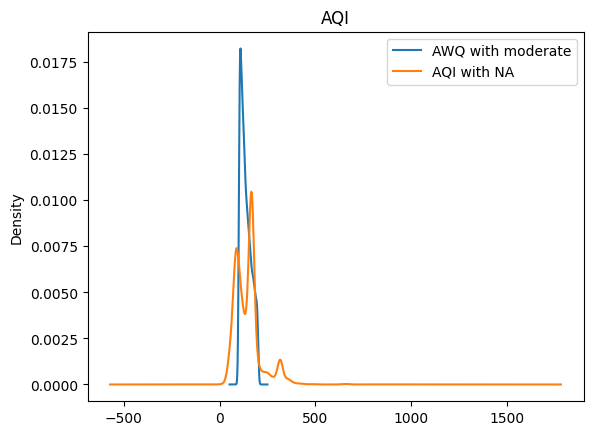

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['AQI_Bucket']=='Moderate']['AQI'].plot(kind = 'kde',ax=ax)
df[df['AQI_Bucket'].isnull()]['AQI'].plot(kind = 'kde',ax=ax)



lines,labels = ax.get_legend_handles_labels()
labels = ['AWQ with moderate','AQI with NA']
ax.legend(lines,labels,loc = 'best')

plt.title('AQI')

In [16]:
temp = df[df['AQI_Bucket']=='Moderate']['AQI']

In [17]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='most_frequent')
df[['AQI_Bucket']] = impute.fit_transform(df[['AQI_Bucket']])

In [18]:
df.isnull().sum()

PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

Text(0, 0.5, 'Weather')

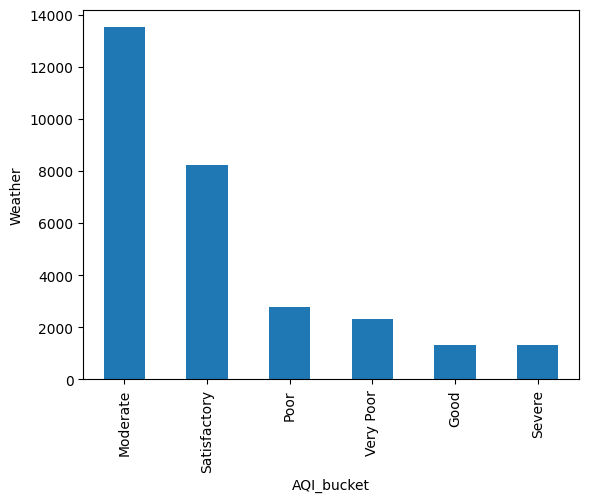

In [19]:
df['AQI_Bucket'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('AQI_bucket')
plt.ylabel('Weather')

Text(0.5, 1.0, 'GarageQual')

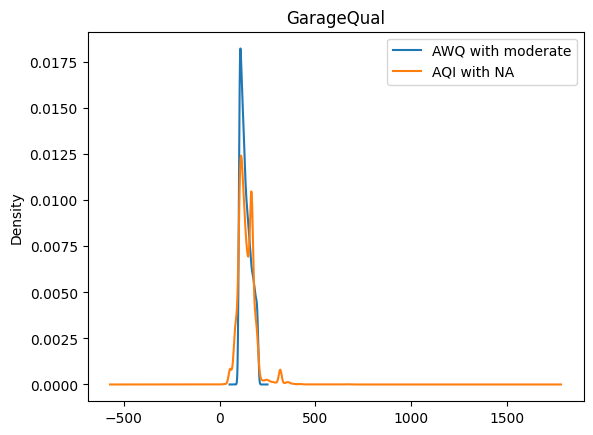

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

df[df['AQI_Bucket']=='Moderate']['AQI'].plot(kind = 'kde',ax=ax)



lines,labels = ax.get_legend_handles_labels()
labels = ['AWQ with moderate','AQI with NA']
ax.legend(lines,labels,loc = 'best')
plt.title('GarageQual')

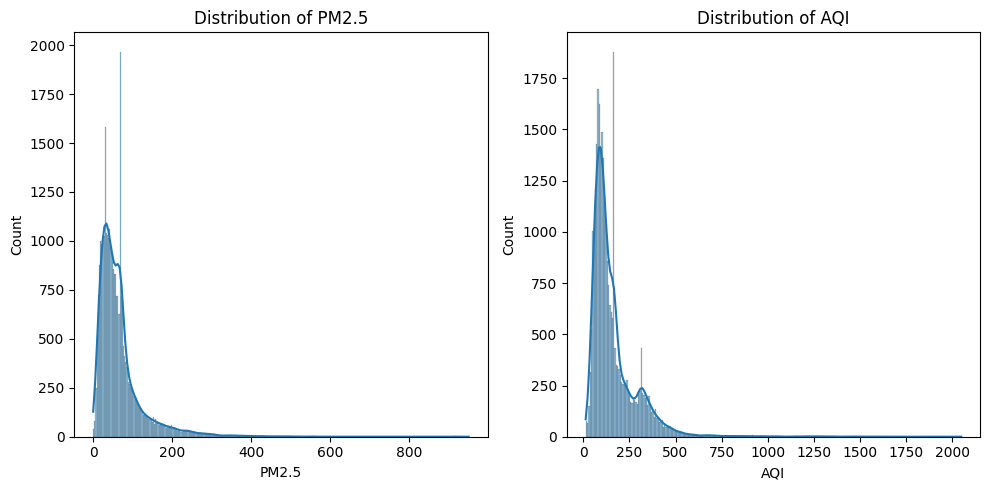

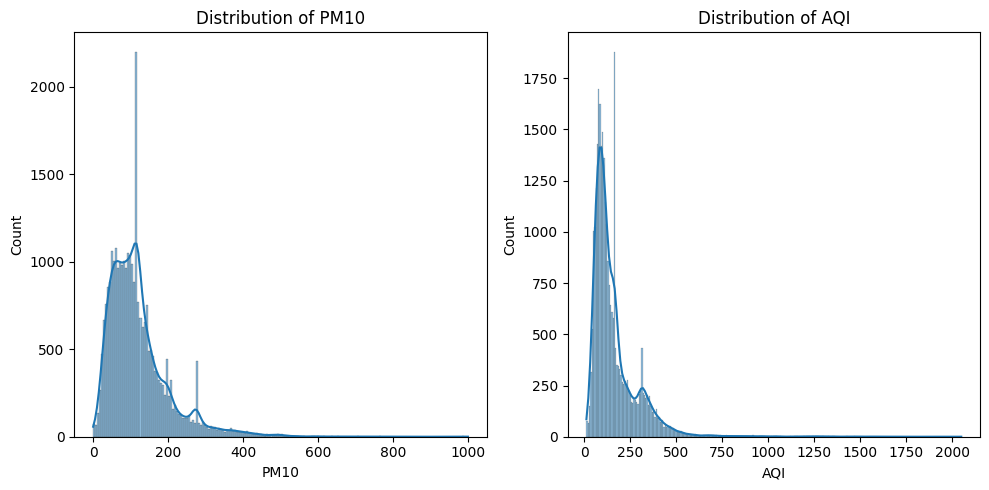

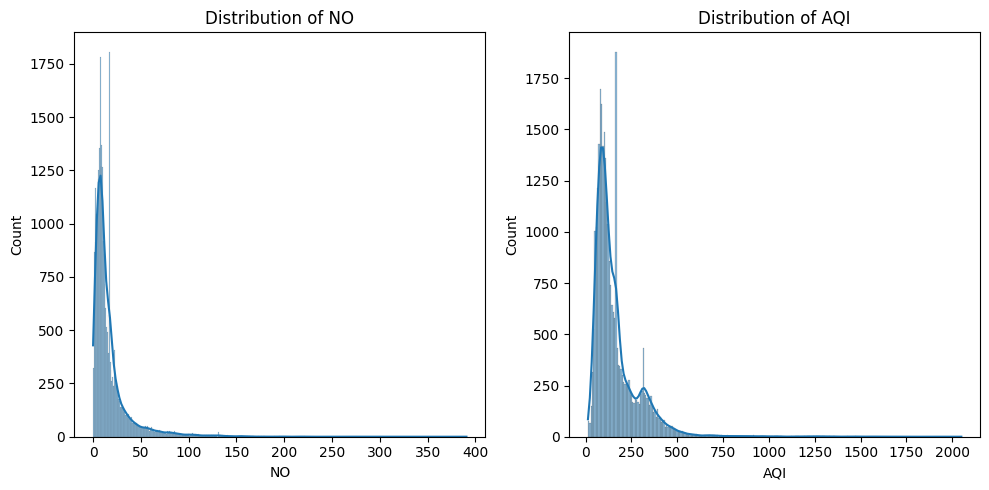

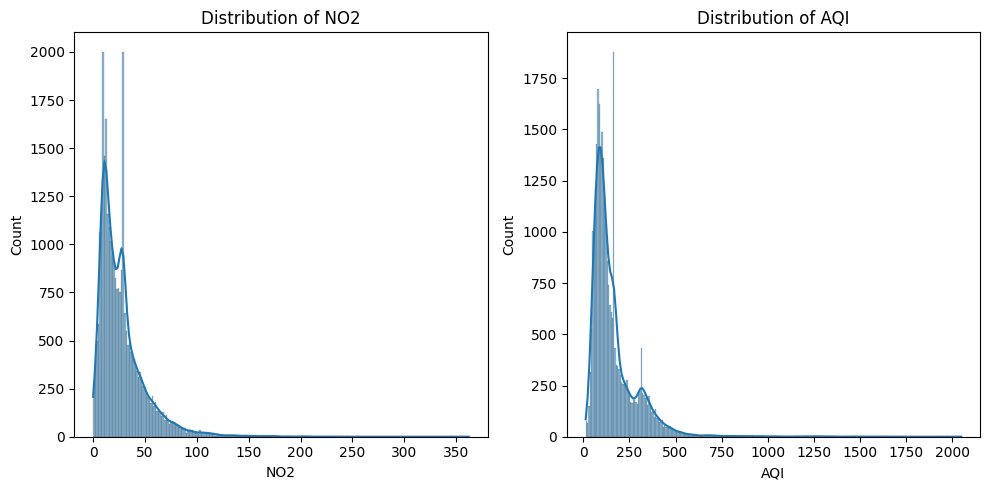

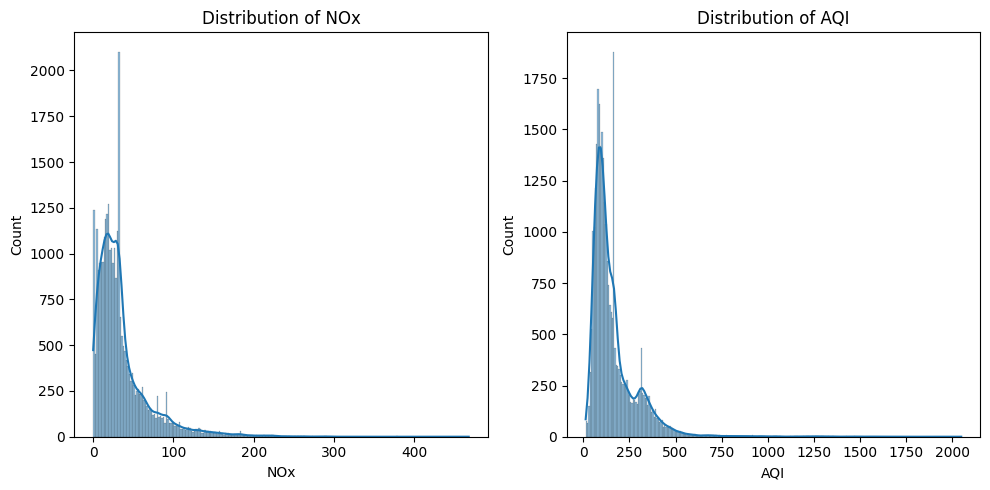

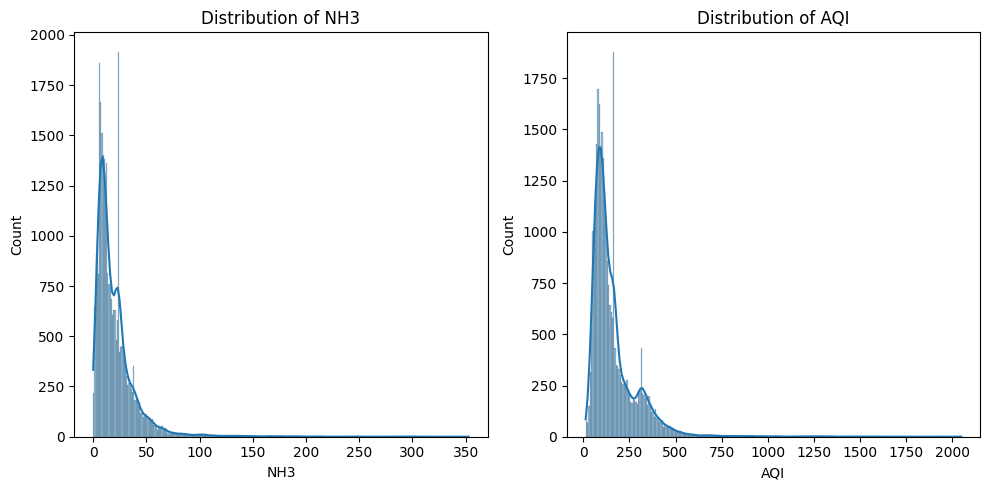

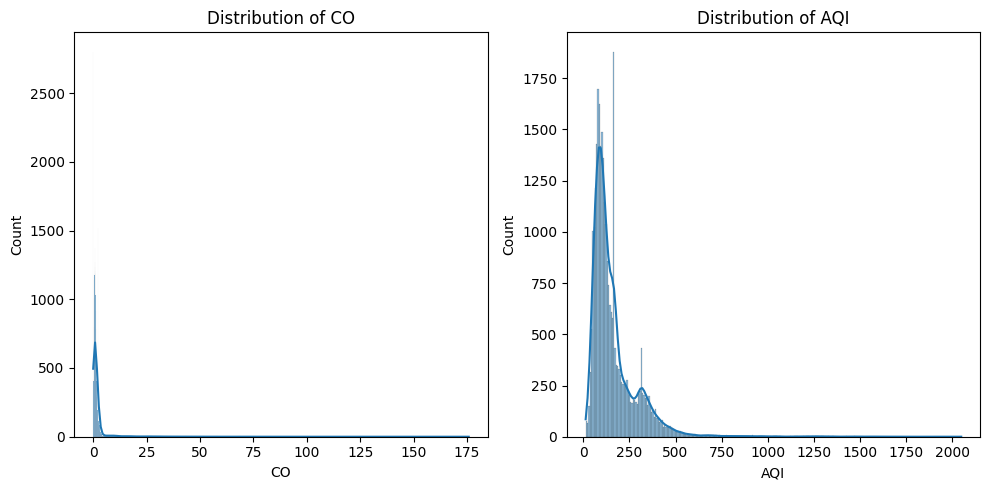

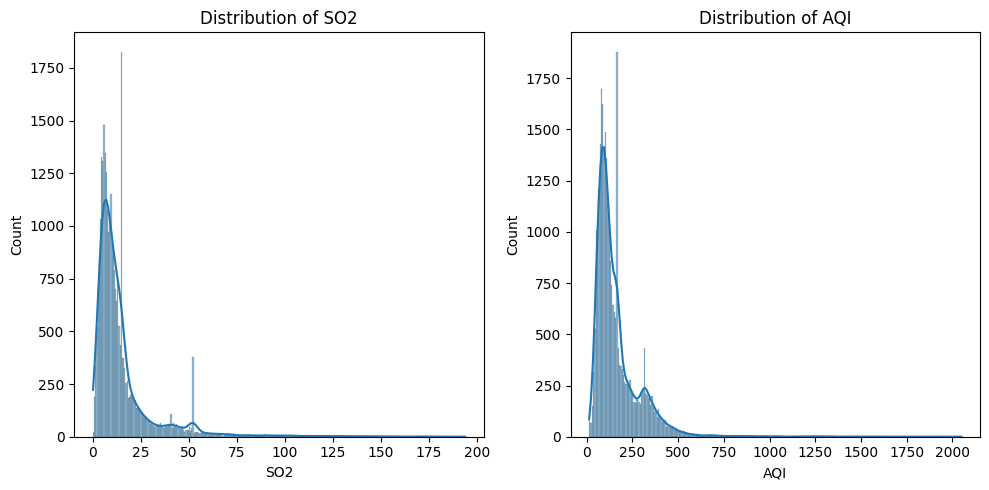

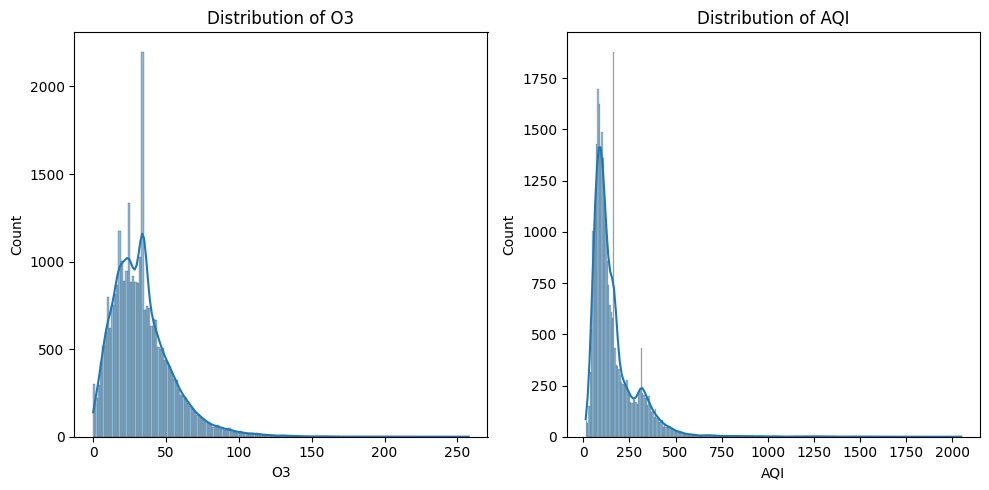

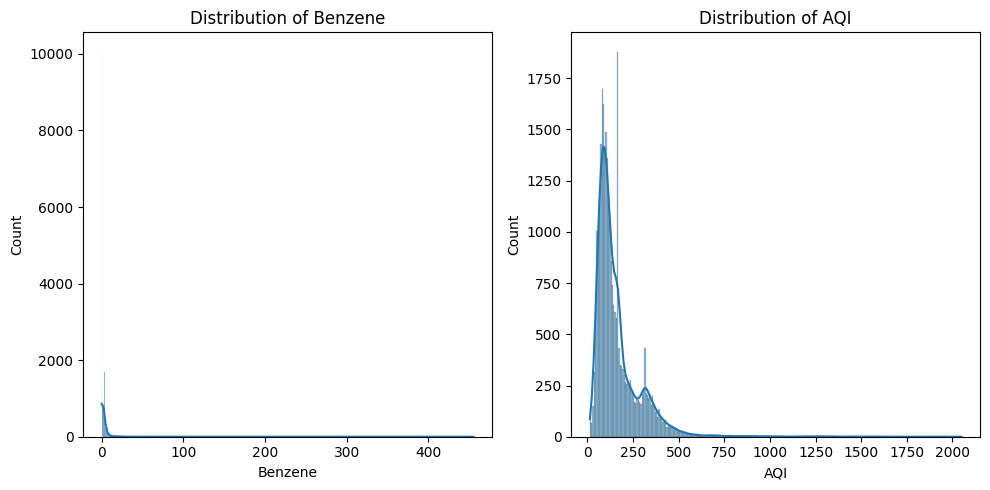

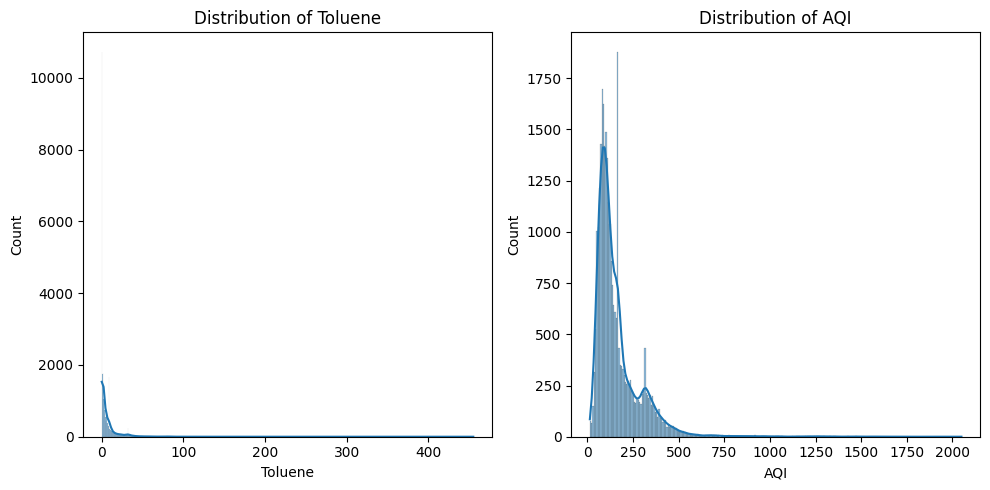

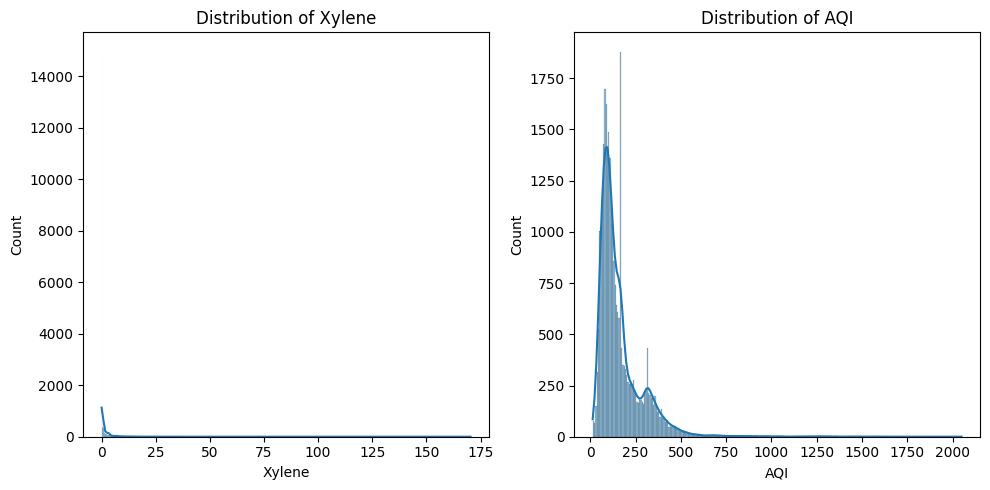

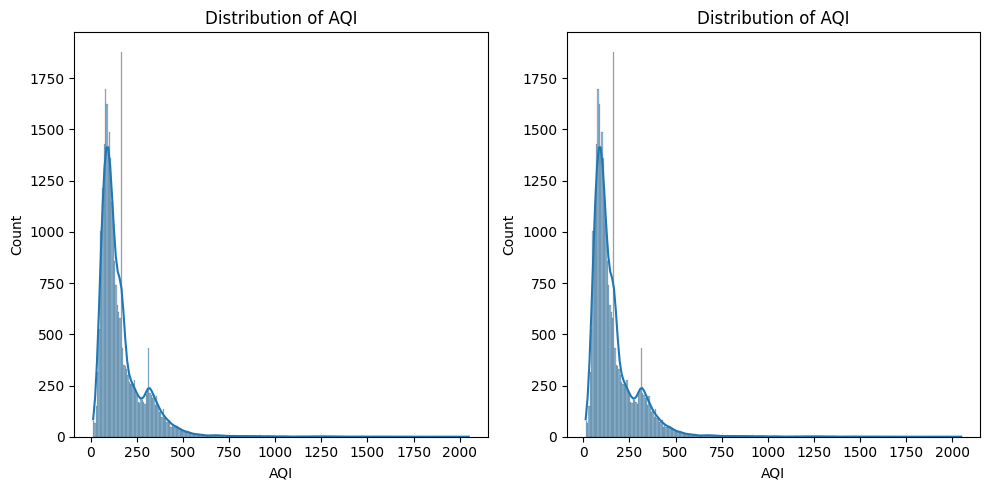

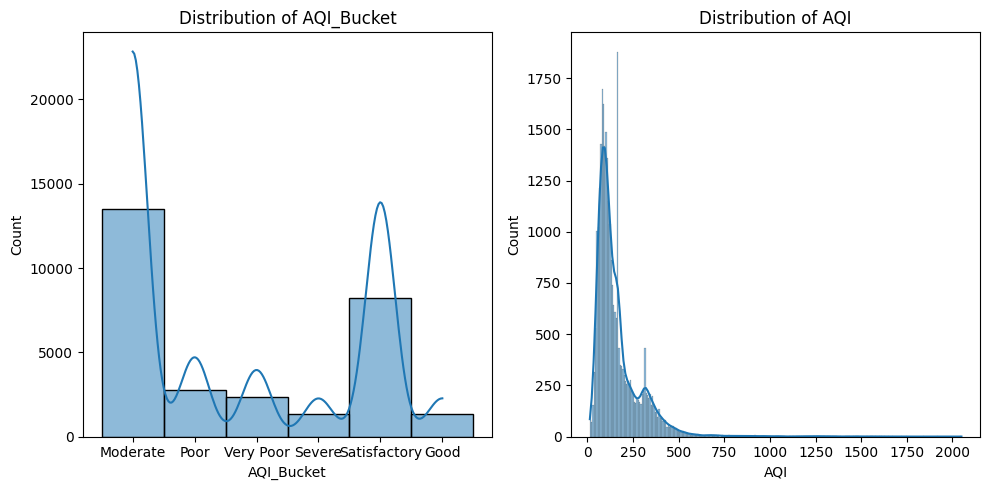

In [21]:
for i in df.columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.subplot(1, 2, 2)
    sns.histplot(df['AQI'], kde=True)
    plt.title('Distribution of AQI')   
    plt.tight_layout()
    plt.show()

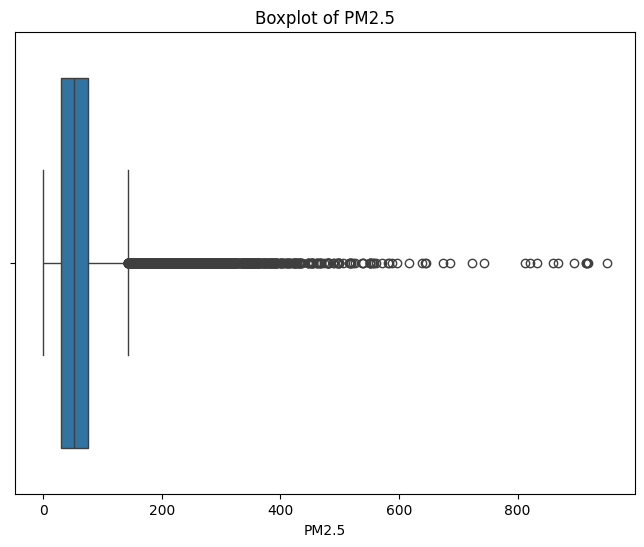

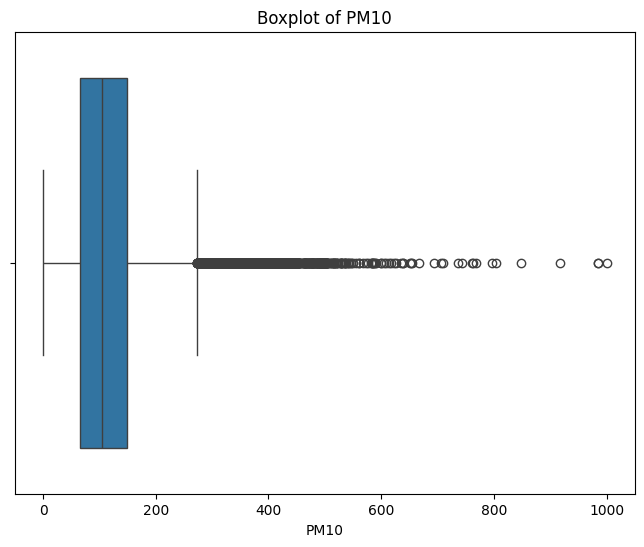

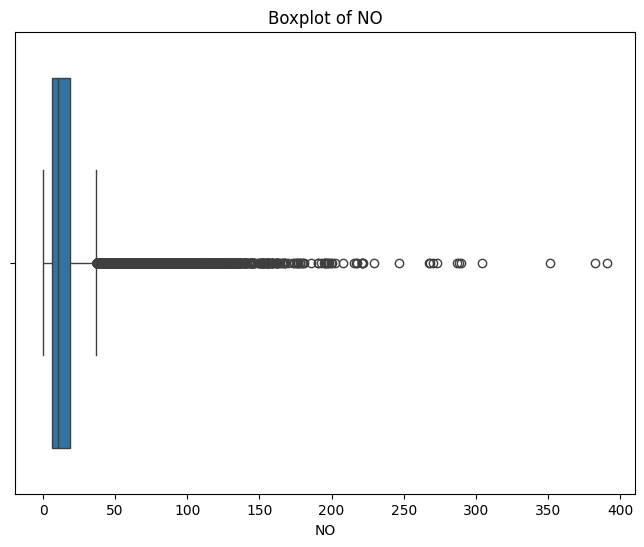

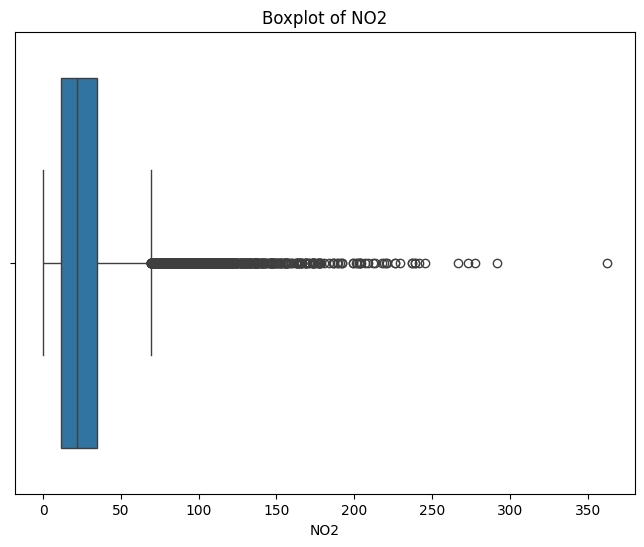

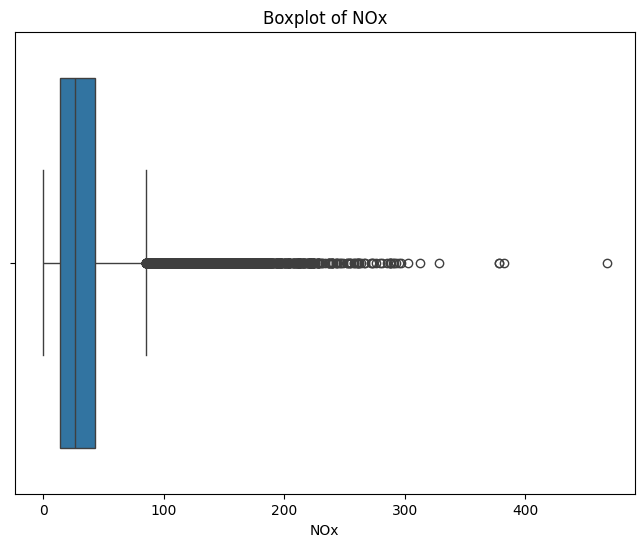

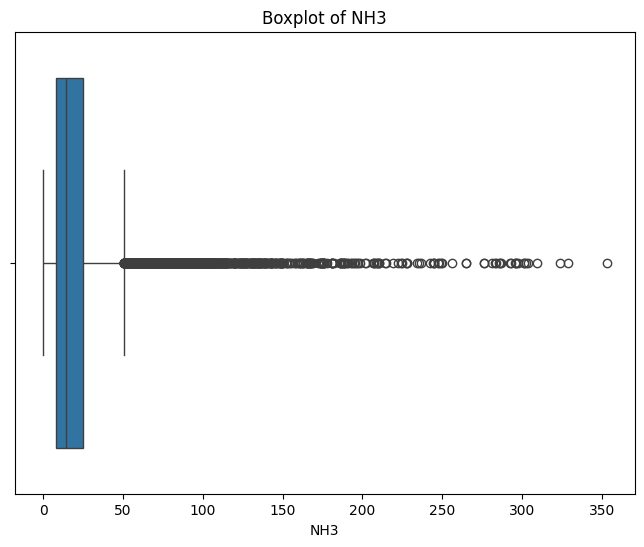

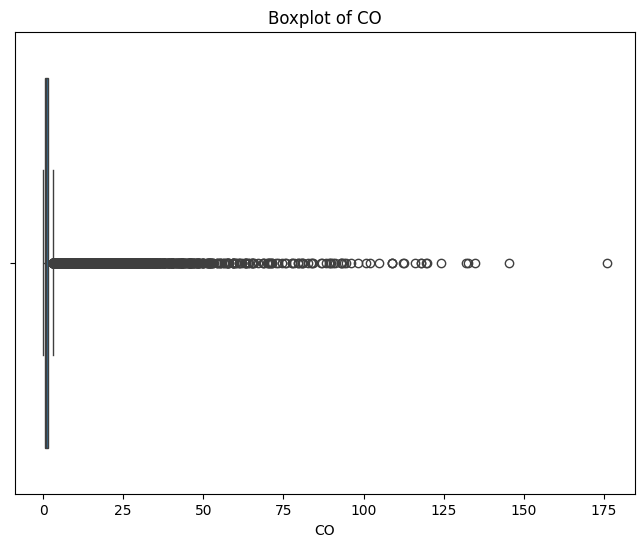

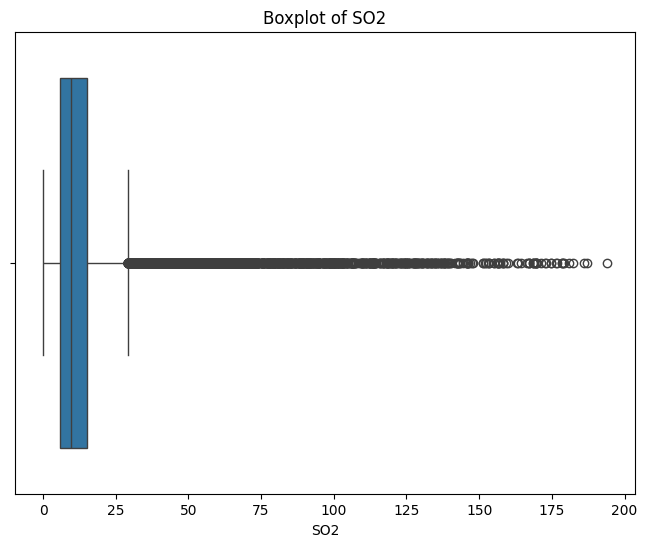

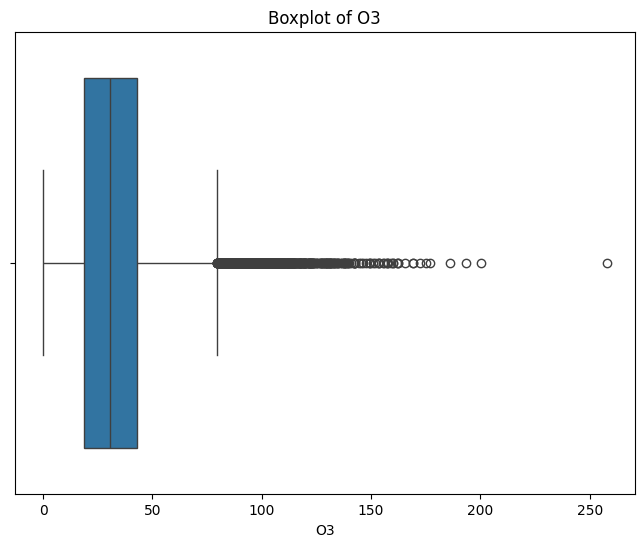

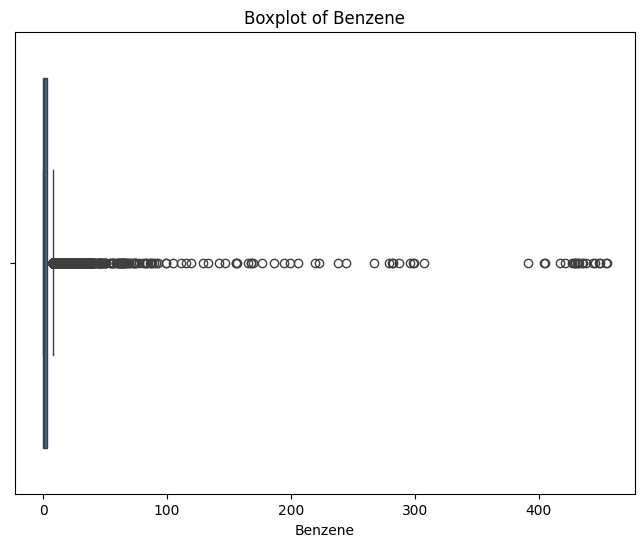

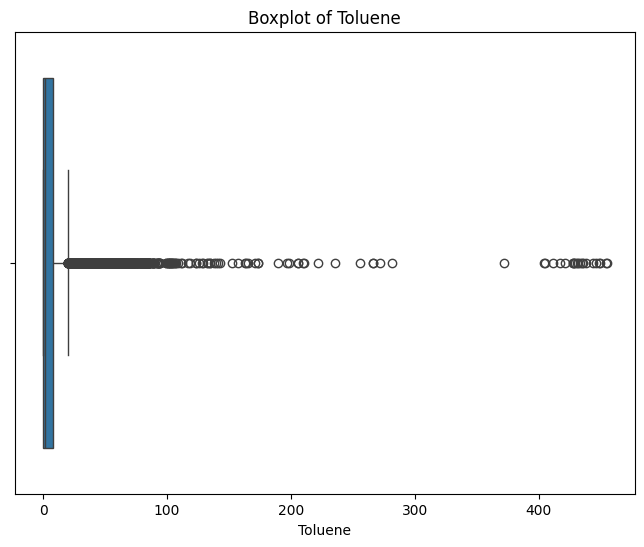

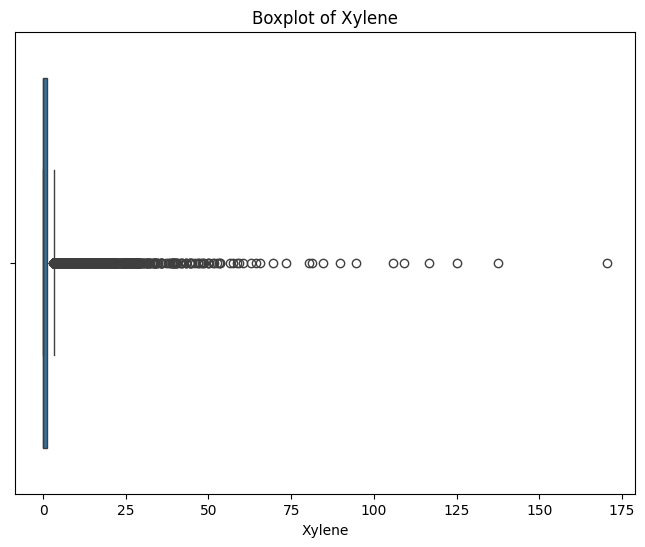

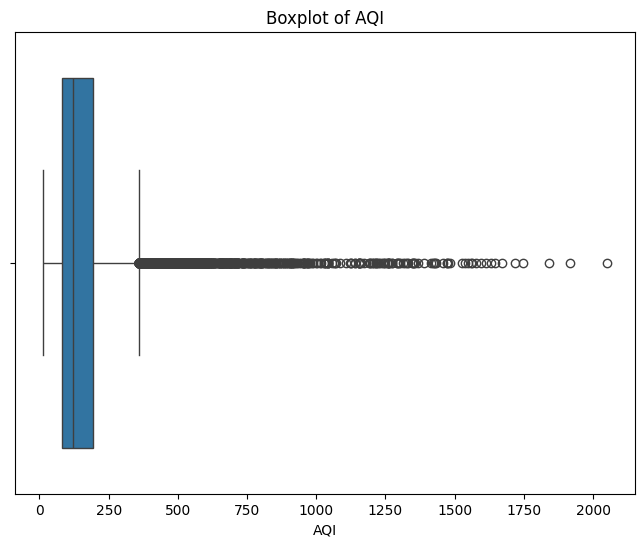

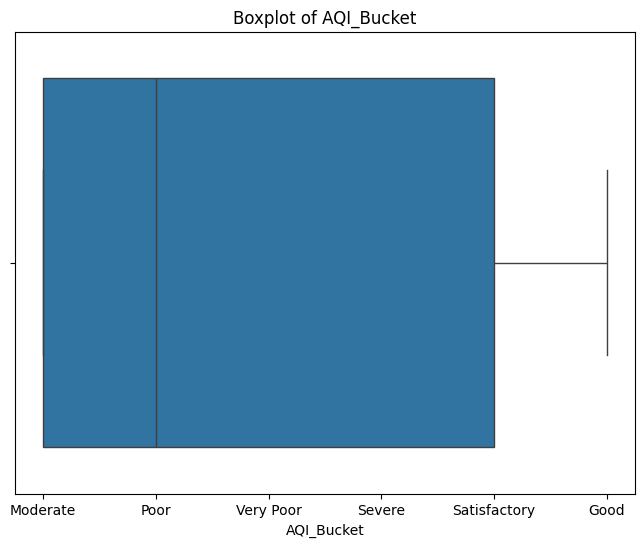

In [22]:
for i in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [23]:
for i in df.columns:
    if i == 'AQI_Bucket':
        break
    else:
        percentile25 = df[i].quantile(0.25)
        percentile75 = df[i].quantile(0.75)
        iqr = percentile75-percentile25
        print(f"25th percentile of {i} is {percentile25}\n75th percentile of {i} is {percentile75}\n IQR for {i} is {iqr}")


25th percentile of PM2.5 is 30.887999999999998
75th percentile of PM2.5 is 75.872
 IQR for PM2.5 is 44.984
25th percentile of PM10 is 64.755
75th percentile of PM10 is 148.211
 IQR for PM10 is 83.45600000000002
25th percentile of NO is 6.11
75th percentile of NO is 18.5
 IQR for NO is 12.39
25th percentile of NO2 is 11.76
75th percentile of NO2 is 34.785
 IQR for NO2 is 23.025
25th percentile of NOx is 14.21
75th percentile of NOx is 42.71
 IQR for NOx is 28.5
25th percentile of NH3 is 7.98
75th percentile of NH3 is 25.095
 IQR for NH3 is 17.115
25th percentile of CO is 0.51
75th percentile of CO is 1.58
 IQR for CO is 1.07
25th percentile of SO2 is 5.87
75th percentile of SO2 is 15.18
 IQR for SO2 is 9.309999999999999
25th percentile of O3 is 18.86
75th percentile of O3 is 43.163
 IQR for O3 is 24.302999999999997
25th percentile of Benzene is 0.02
75th percentile of Benzene is 3.105
 IQR for Benzene is 3.085
25th percentile of Toluene is 0.0
75th percentile of Toluene is 8.11
 IQR for

In [24]:
df.isnull().sum()

PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [25]:
new_df_cap = df.drop(columns='AQI_Bucket')
for col in new_df_cap.columns:
    percentile25 = new_df_cap[col].quantile(0.25)
    percentile75 = new_df_cap[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    new_df_cap[col] = np.where(
        new_df_cap[col] > upper_limit,
        upper_limit,
        np.where(
            new_df_cap[col] < lower_limit,
            lower_limit,
            new_df_cap[col]
        )
    )

In [26]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,23.178,126.112,0.92,18.22,17.15,10.294,0.92,27.64,133.36,0.0,0.02,0.0,122.4,Moderate
1,24.736,123.518,0.97,15.69,16.46,10.366,0.97,24.55,34.06,3.68,5.5,3.77,124.2,Moderate
2,121.276,161.864,17.4,19.3,29.7,8.95,17.4,29.07,30.7,6.8,16.4,2.25,363.6,Moderate
3,40.686,159.47,1.7,18.48,17.97,12.088,1.7,18.59,36.08,4.43,10.14,1.0,136.6,Moderate
4,156.074,215.888,22.1,21.42,37.76,9.036,22.1,39.33,39.31,7.01,18.89,2.78,384.6,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.3,2.24,12.07,0.73,41.0,Good
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.0,68.0,Satisfactory
29529,16.64,49.97,4.05,29.26,18.8,10.03,0.52,9.84,28.3,0.0,0.0,0.0,54.0,Satisfactory


In [27]:
df.shape

(29531, 14)

In [28]:
new_df_cap['AQI_Bucket'] = df['AQI_Bucket']

In [29]:
new_df_cap

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,23.178,126.112,0.92,18.22,17.15,10.294,0.92,27.64,79.6175,0.0,0.02,0.0,122.4,Moderate
1,24.736,123.518,0.97,15.69,16.46,10.366,0.97,24.55,34.06,3.68,5.5,3.22,124.2,Moderate
2,121.276,161.864,17.4,19.3,29.7,8.95,3.185,29.07,30.7,6.8,16.4,2.25,358.0,Moderate
3,40.686,159.47,1.7,18.48,17.97,12.088,1.7,18.59,36.08,4.43,10.14,1.0,136.6,Moderate
4,143.348,215.888,22.1,21.42,37.76,9.036,3.185,29.145,39.31,7.01,18.89,2.78,358.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.3,2.24,12.07,0.73,41.0,Good
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.0,68.0,Satisfactory
29529,16.64,49.97,4.05,29.26,18.8,10.03,0.52,9.84,28.3,0.0,0.0,0.0,54.0,Satisfactory


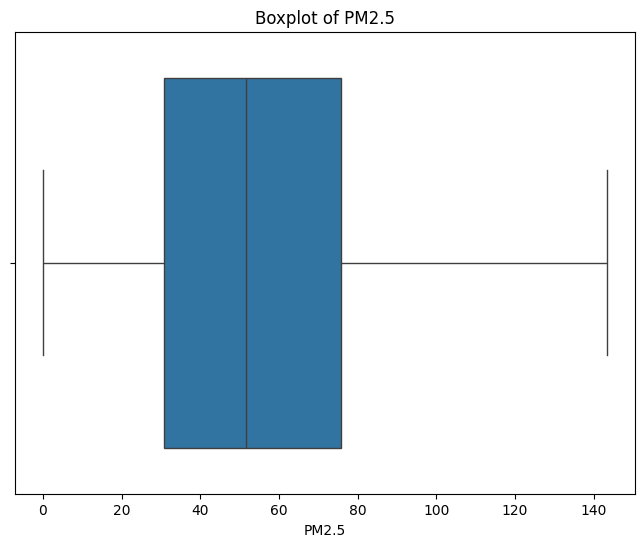

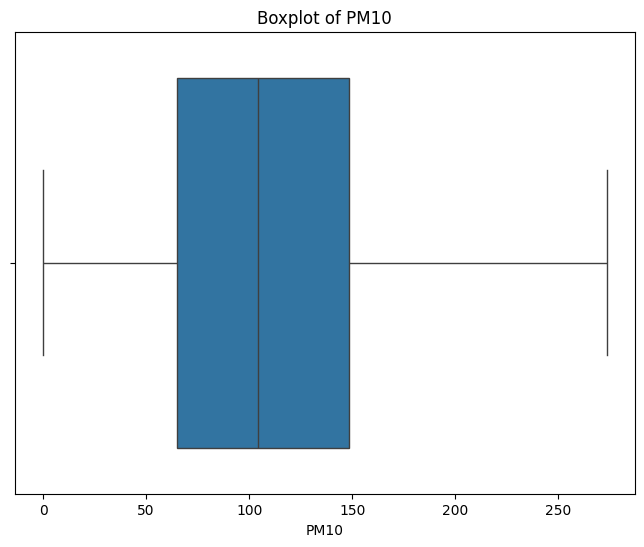

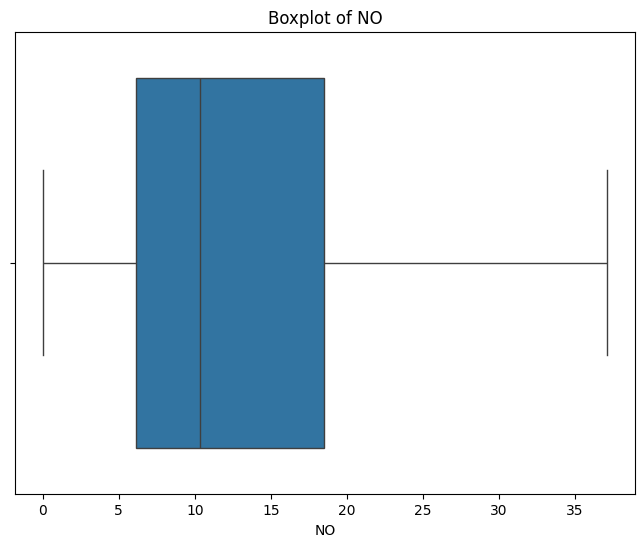

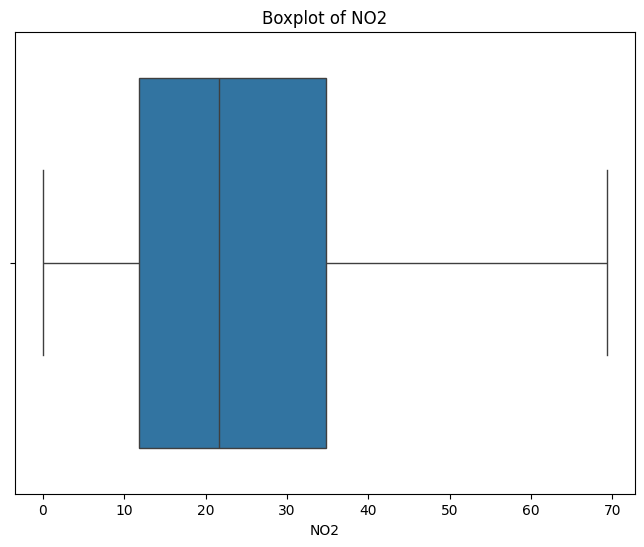

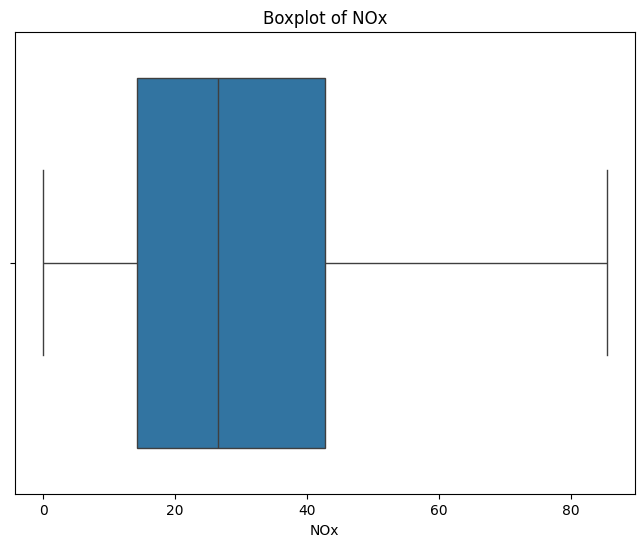

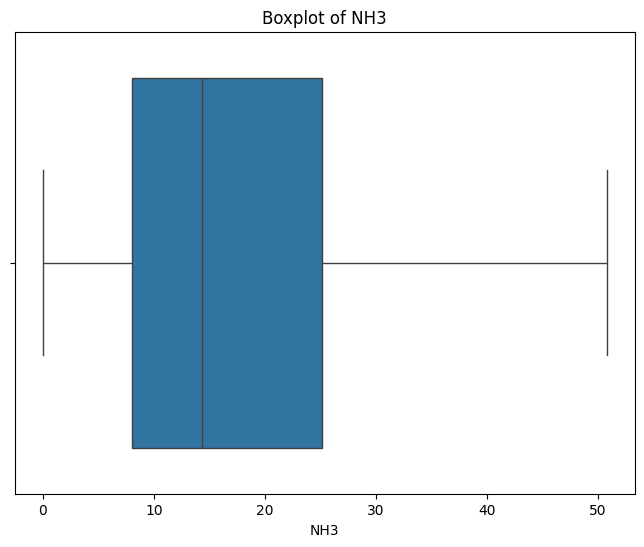

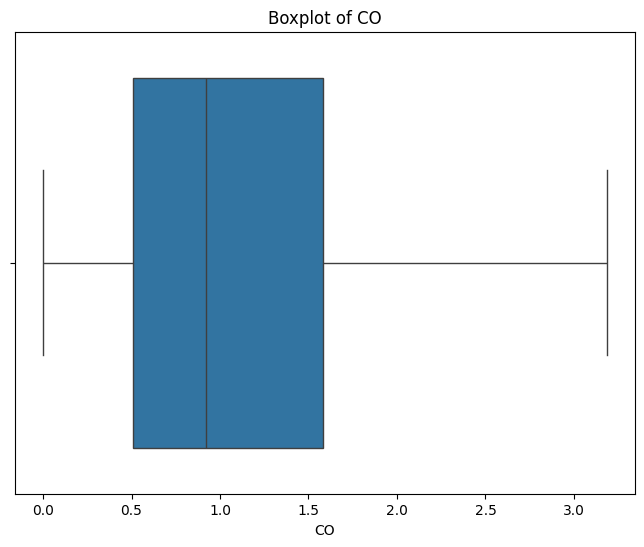

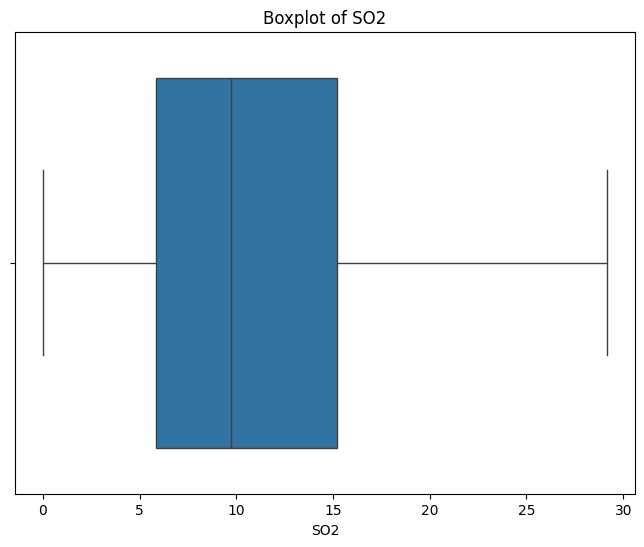

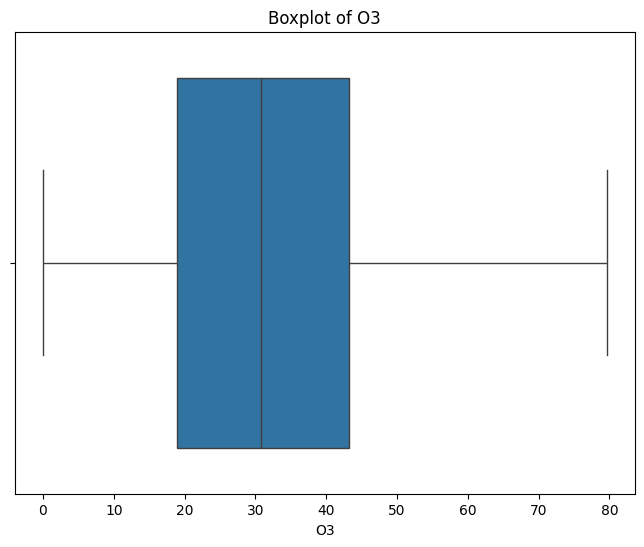

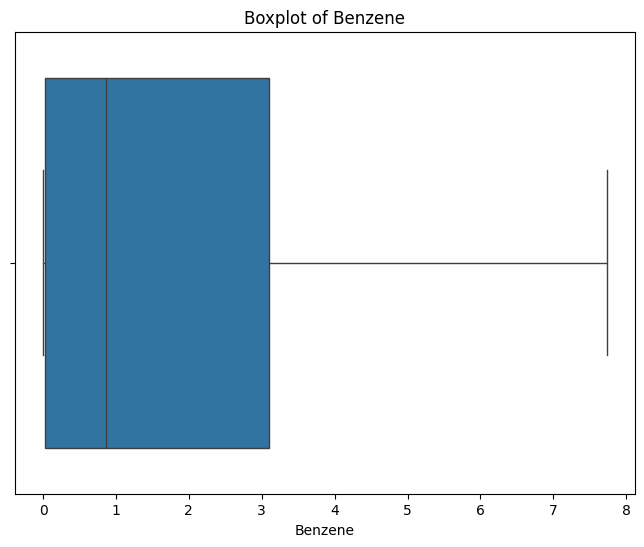

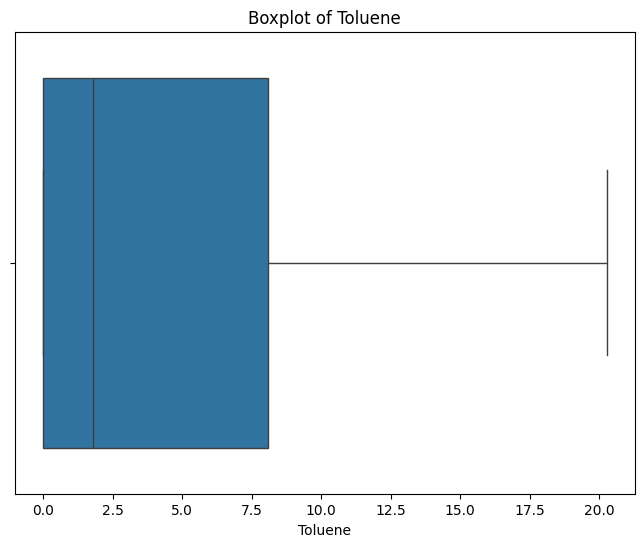

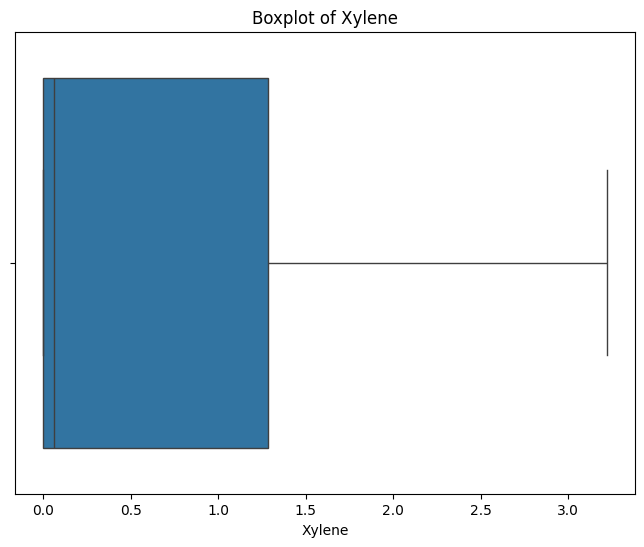

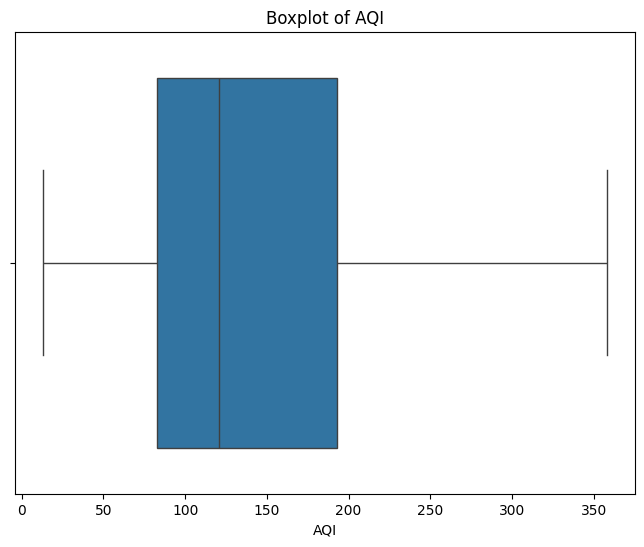

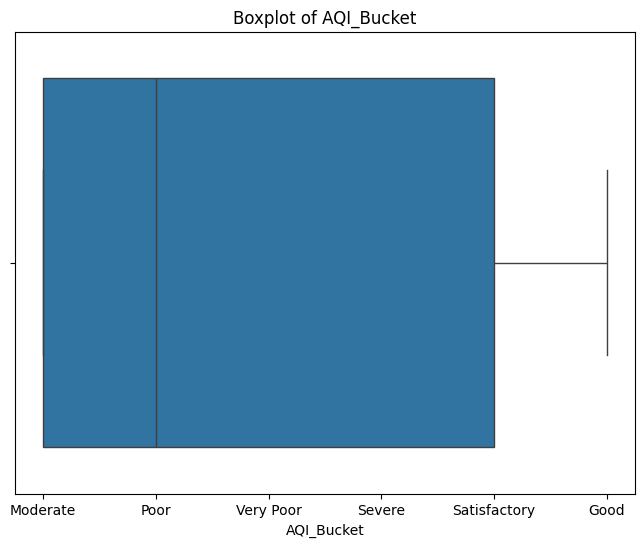

In [30]:
for i in new_df_cap.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=new_df_cap[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [31]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[['Severe', 'Very Poor', 'Poor', 'Satisfactory', 'Moderate', 'Good']])
new_df_cap[['AQI_Bucket']] = enc.fit_transform(new_df_cap[['AQI_Bucket']])

In [32]:
new_df_cap

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,23.178,126.112,0.92,18.22,17.15,10.294,0.92,27.64,79.6175,0.0,0.02,0.0,122.4,4.0
1,24.736,123.518,0.97,15.69,16.46,10.366,0.97,24.55,34.06,3.68,5.5,3.22,124.2,4.0
2,121.276,161.864,17.4,19.3,29.7,8.95,3.185,29.07,30.7,6.8,16.4,2.25,358.0,4.0
3,40.686,159.47,1.7,18.48,17.97,12.088,1.7,18.59,36.08,4.43,10.14,1.0,136.6,4.0
4,143.348,215.888,22.1,21.42,37.76,9.036,3.185,29.145,39.31,7.01,18.89,2.78,358.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.3,2.24,12.07,0.73,41.0,5.0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,3.0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.0,68.0,3.0
29529,16.64,49.97,4.05,29.26,18.8,10.03,0.52,9.84,28.3,0.0,0.0,0.0,54.0,3.0


In [33]:
new_df_cap

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,23.178,126.112,0.92,18.22,17.15,10.294,0.92,27.64,79.6175,0.0,0.02,0.0,122.4,4.0
1,24.736,123.518,0.97,15.69,16.46,10.366,0.97,24.55,34.06,3.68,5.5,3.22,124.2,4.0
2,121.276,161.864,17.4,19.3,29.7,8.95,3.185,29.07,30.7,6.8,16.4,2.25,358.0,4.0
3,40.686,159.47,1.7,18.48,17.97,12.088,1.7,18.59,36.08,4.43,10.14,1.0,136.6,4.0
4,143.348,215.888,22.1,21.42,37.76,9.036,3.185,29.145,39.31,7.01,18.89,2.78,358.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.3,2.24,12.07,0.73,41.0,5.0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,3.0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.0,68.0,3.0
29529,16.64,49.97,4.05,29.26,18.8,10.03,0.52,9.84,28.3,0.0,0.0,0.0,54.0,3.0


In [34]:
new_df_cap2 = new_df_cap.drop(columns=['AQI','AQI_Bucket'])

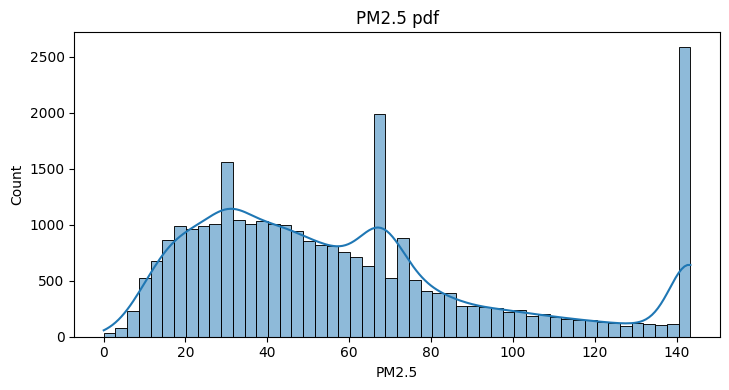

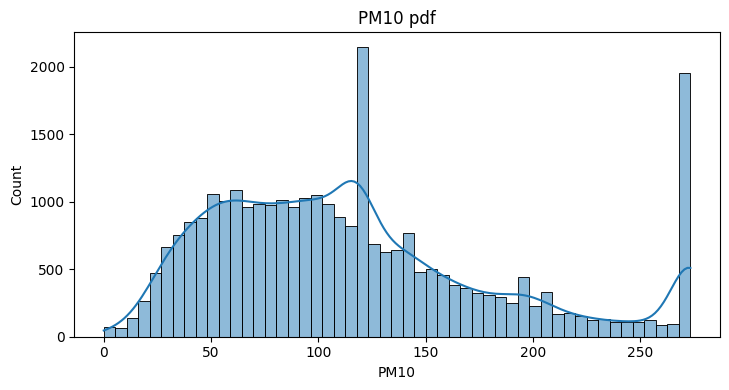

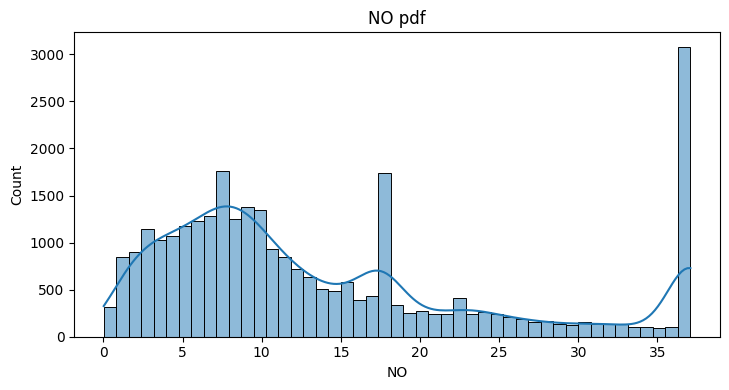

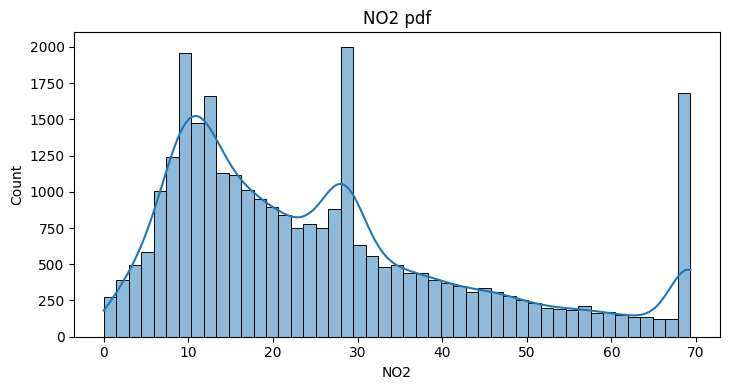

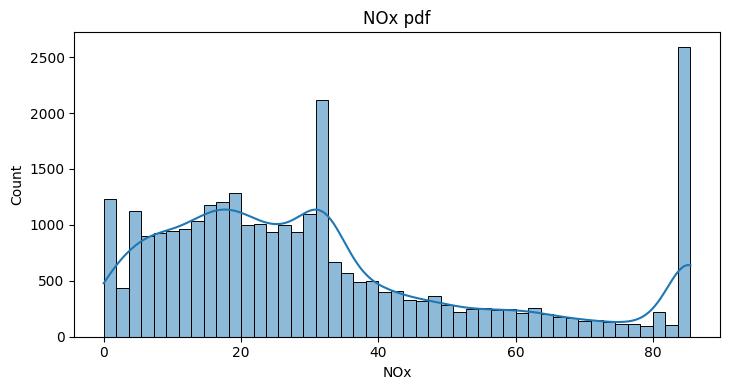

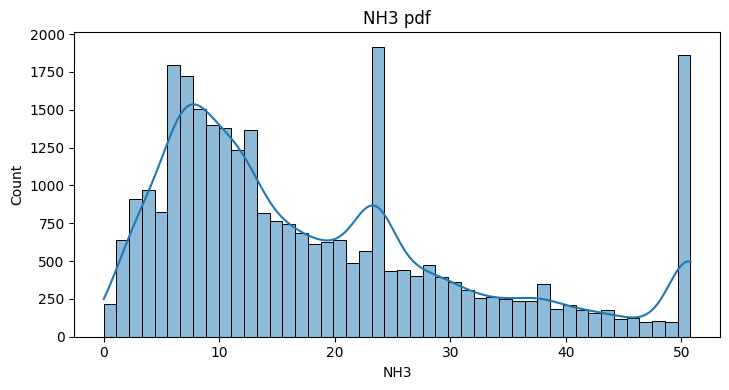

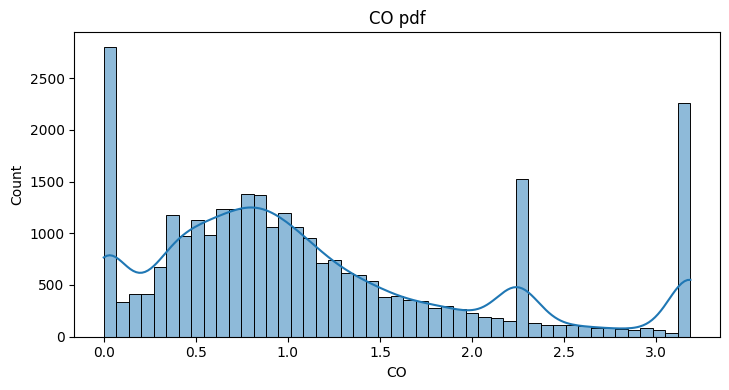

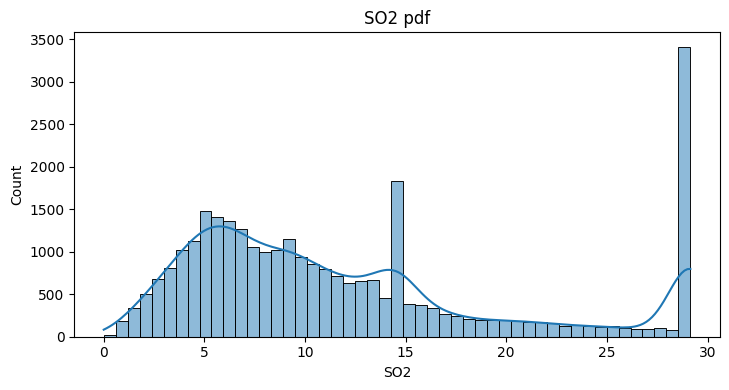

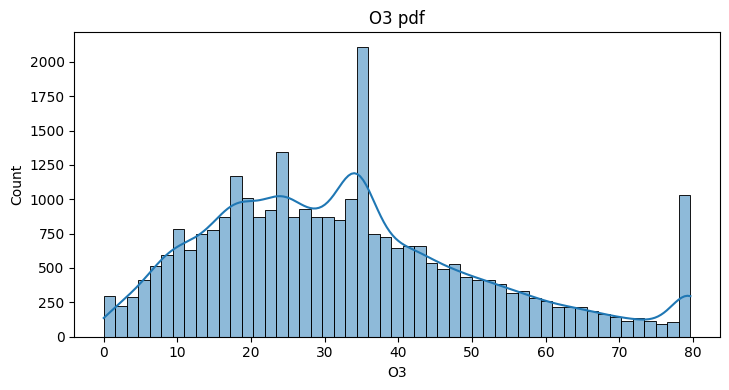

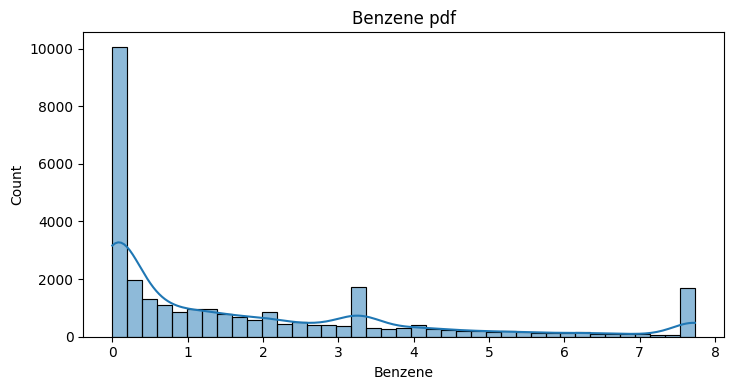

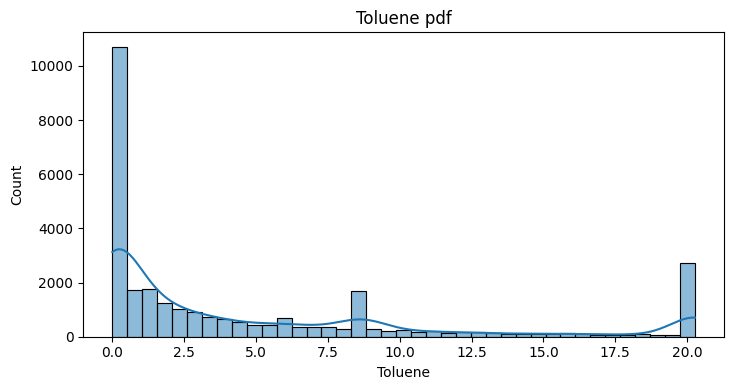

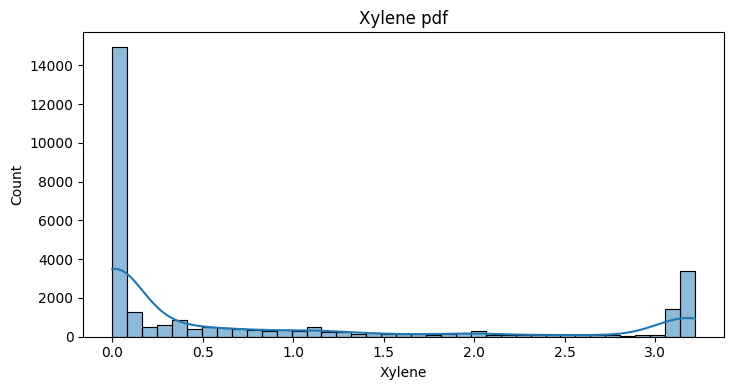

In [35]:
from scipy import stats
for i in new_df_cap2.columns:
    
    plt.figure(figsize=(14,4))

# Plot the Age PDF
    plt.subplot(121)
    sns.histplot(new_df_cap[i], kde=True)  # Use sns.histplot with kde=True for a similar effect to displot
    plt.title(f'{i} pdf')


    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()

In [37]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson')
clf3= ColumnTransformer(transformers=[('tnf1',PowerTransformer(method = 'yeo-johnson'),['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene'])],remainder='passthrough')
new_df_cap = clf3.fit_transform(new_df_cap)

In [39]:
new_df_cap = pd.DataFrame(new_df_cap,columns=df.columns)

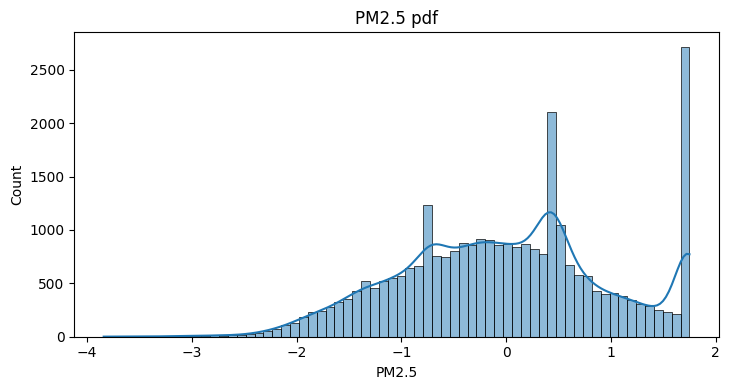

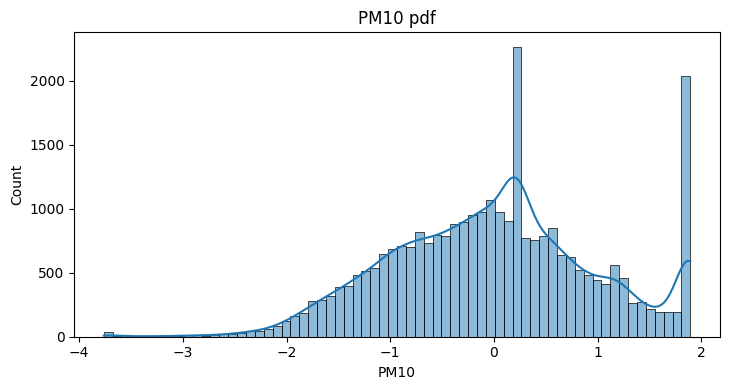

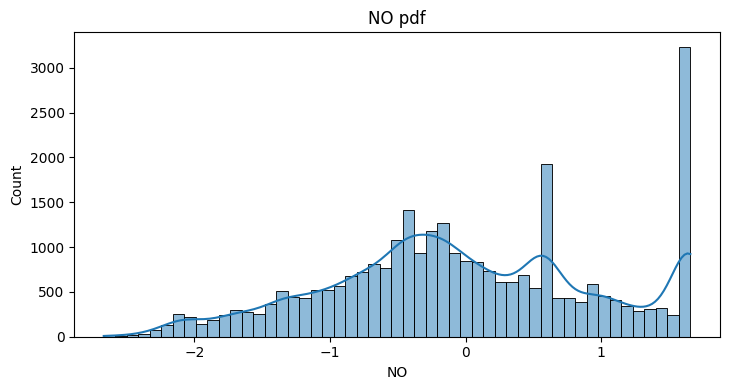

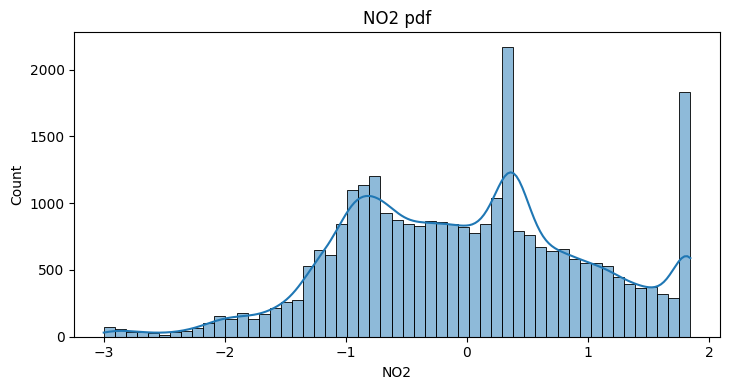

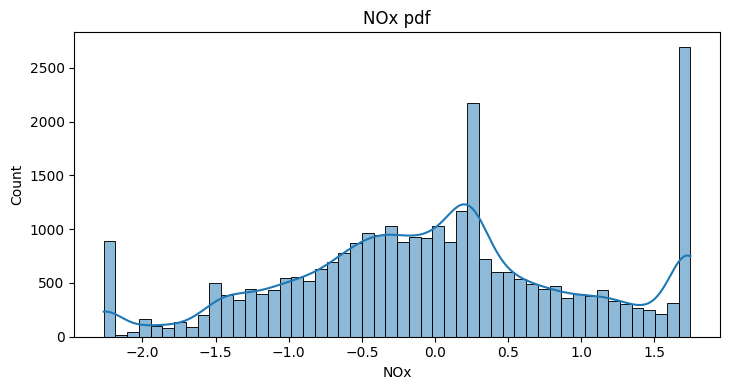

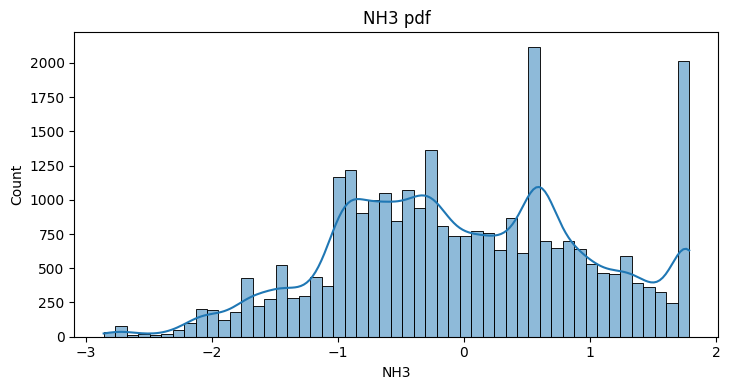

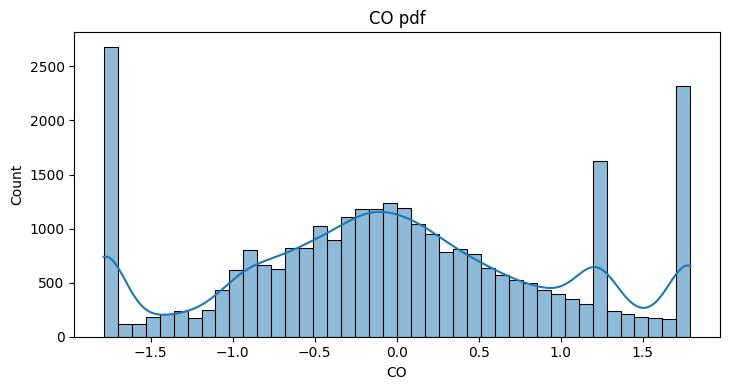

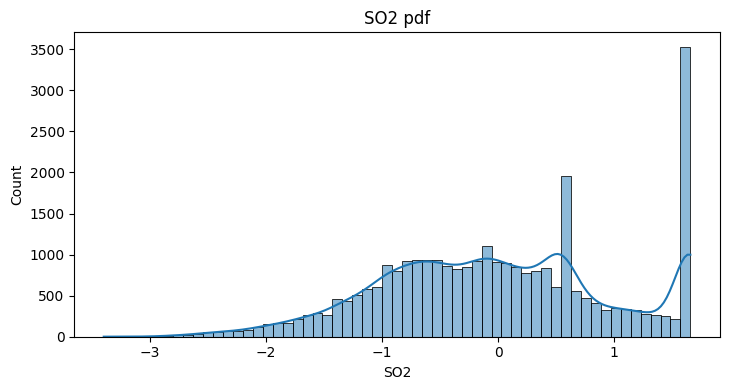

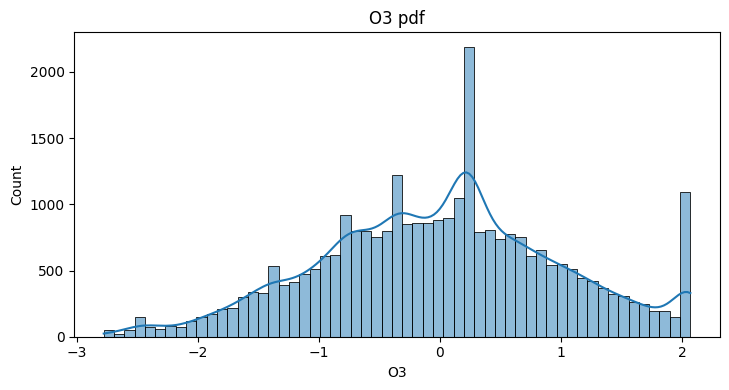

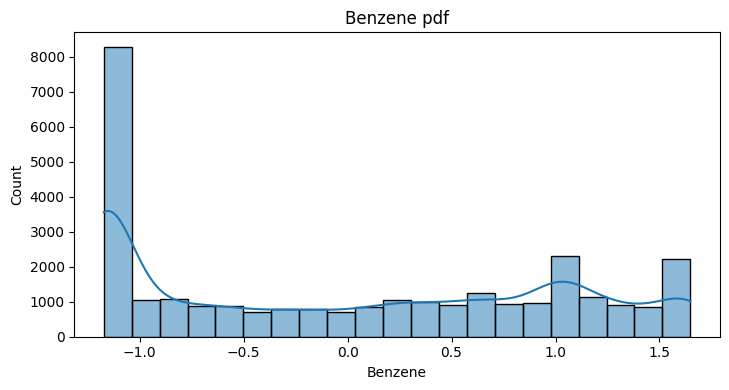

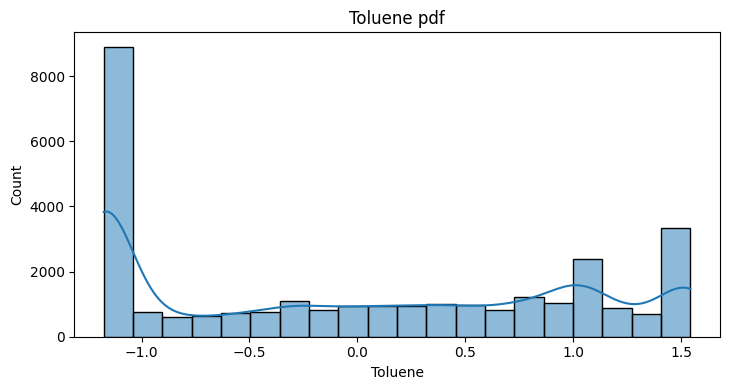

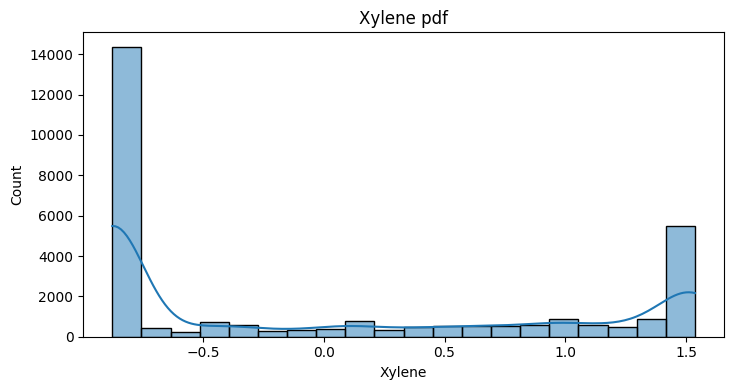

In [40]:
from scipy import stats
for i in new_df_cap2.columns:
    
    plt.figure(figsize=(14,4))

# Plot the Age PDF
    plt.subplot(121)
    sns.histplot(new_df_cap[i], kde=True)  # Use sns.histplot with kde=True for a similar effect to displot
    plt.title(f'{i} pdf')


    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()

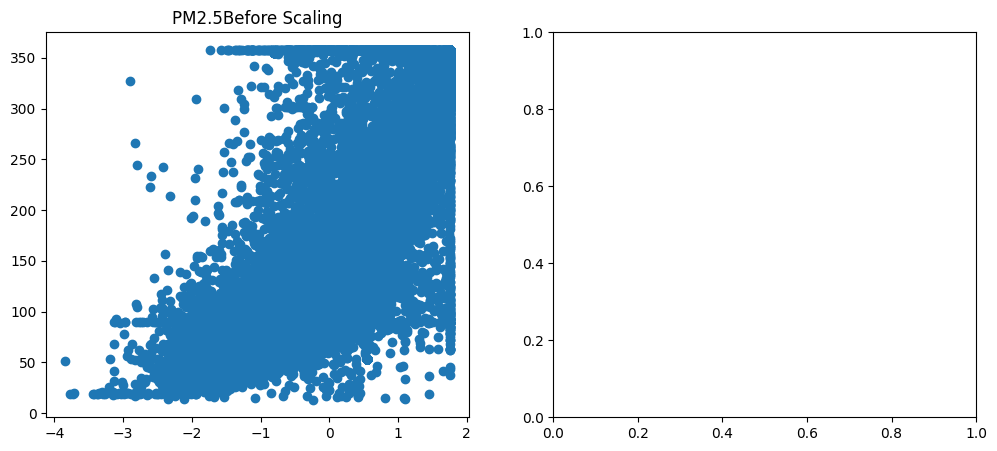

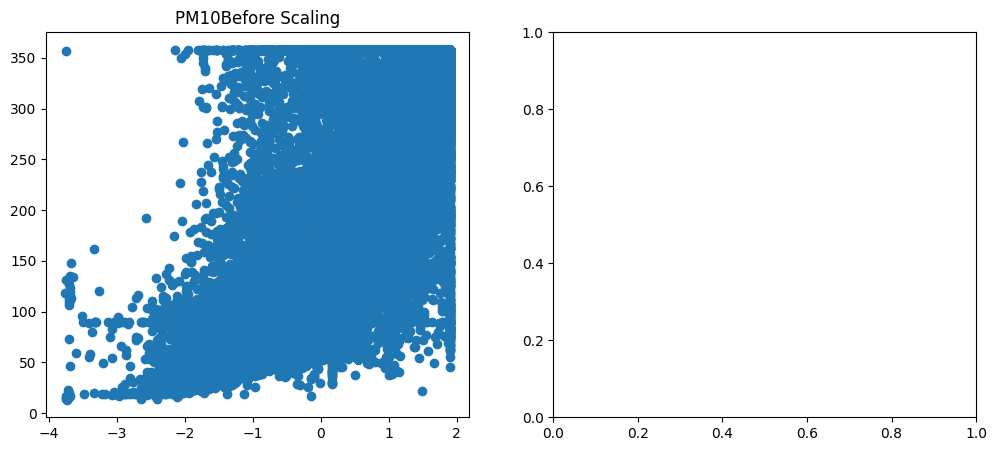

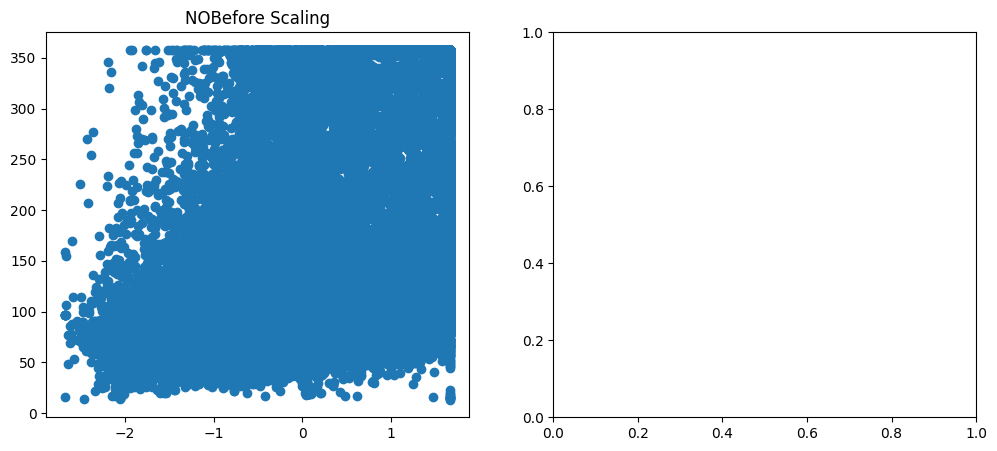

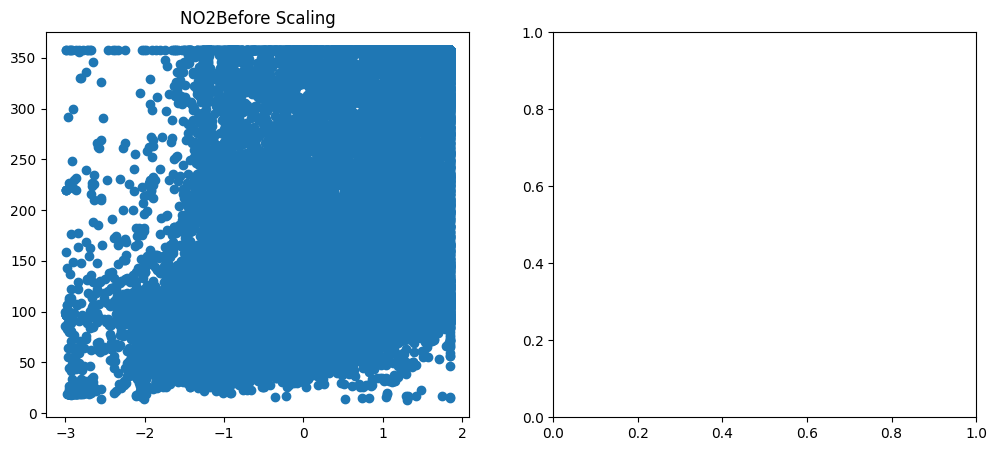

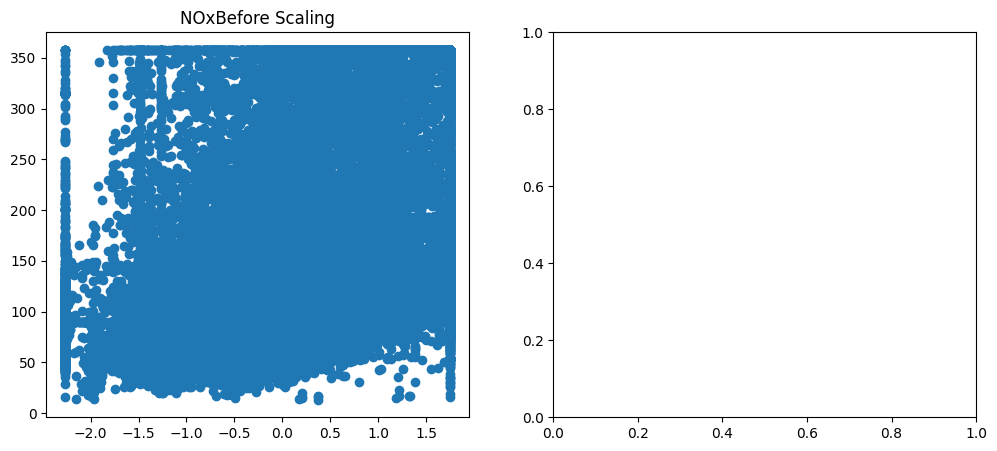

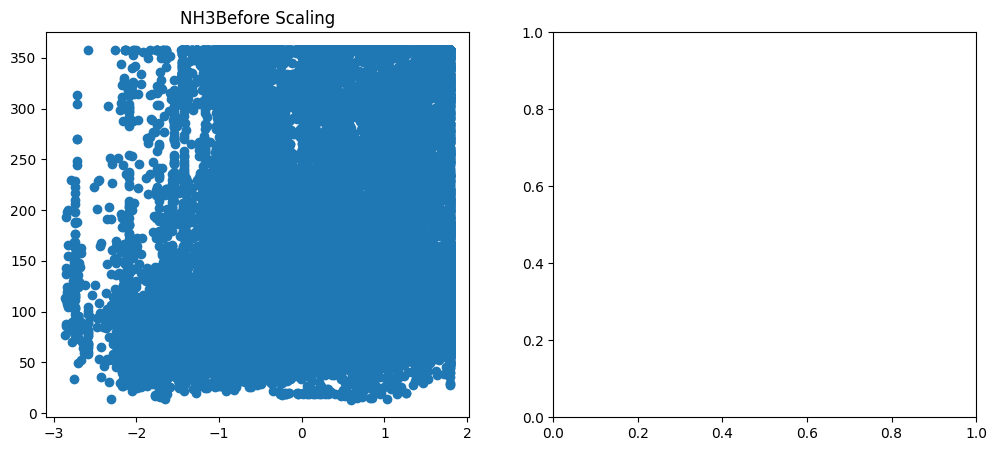

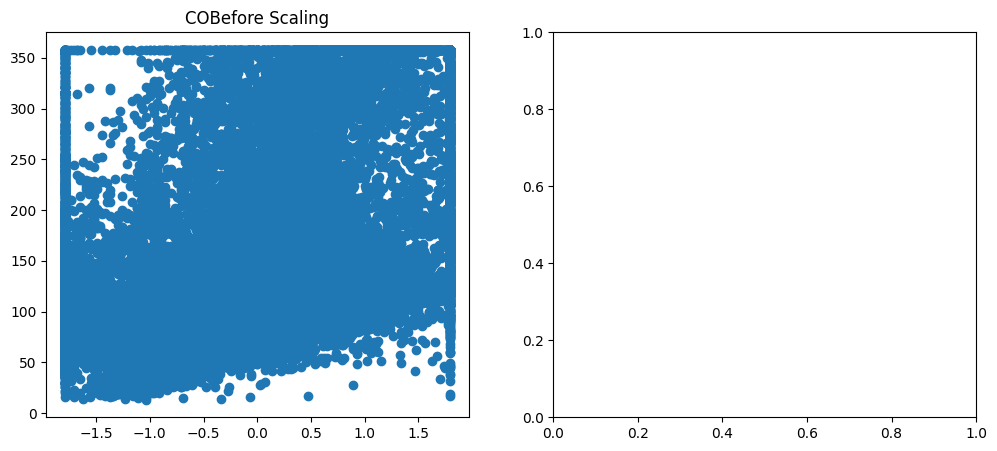

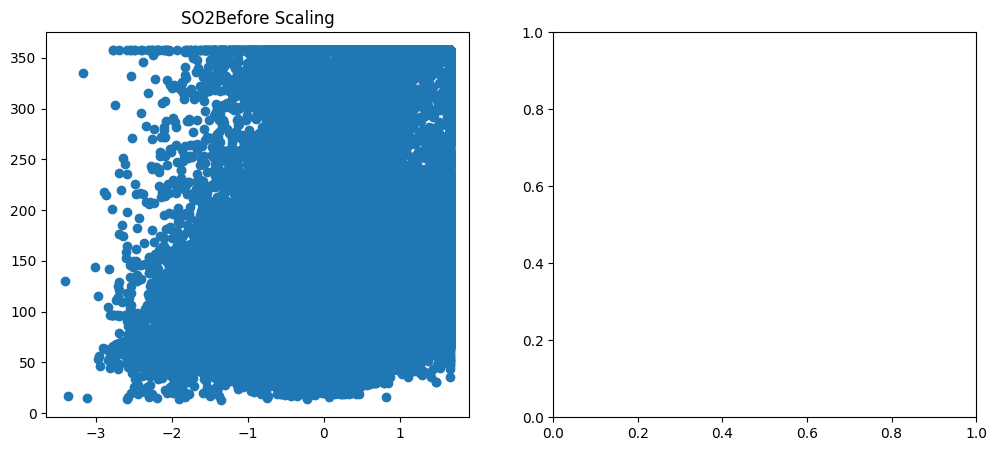

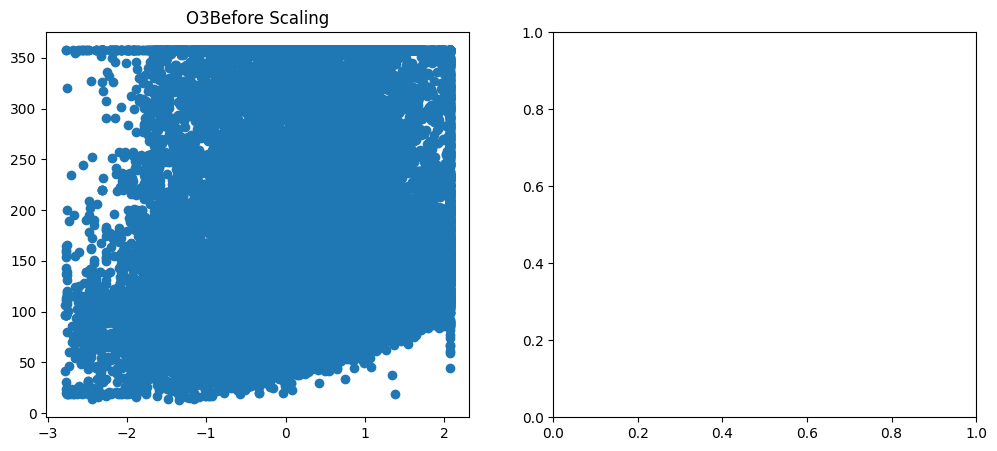

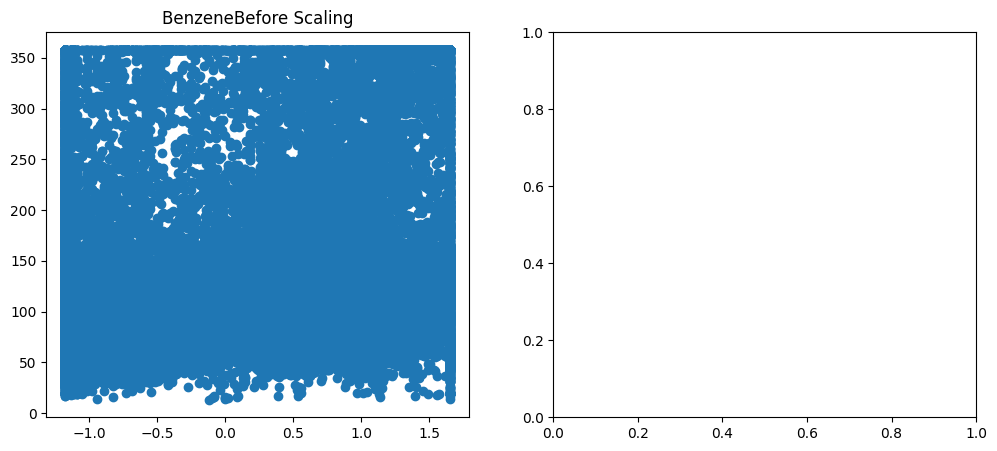

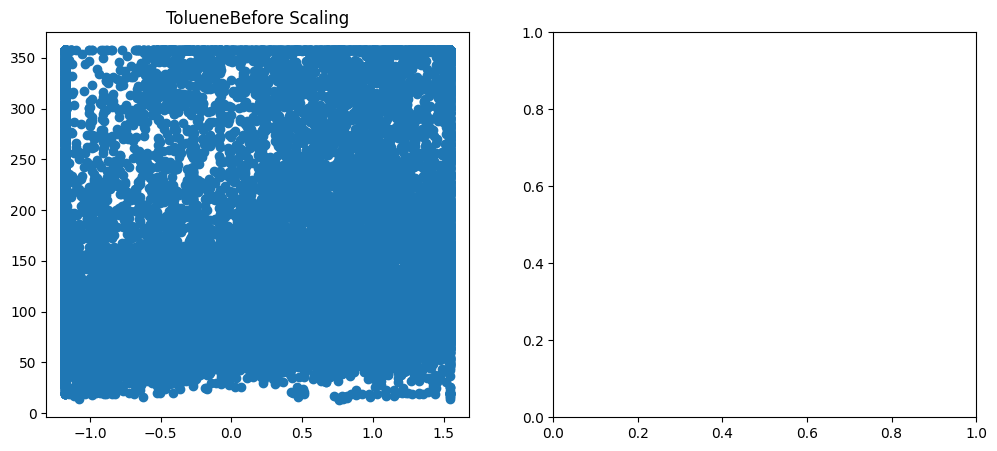

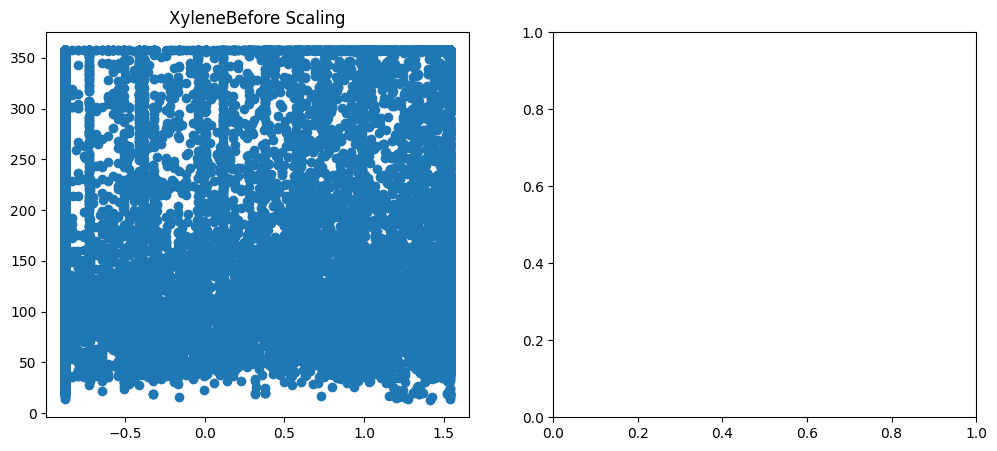

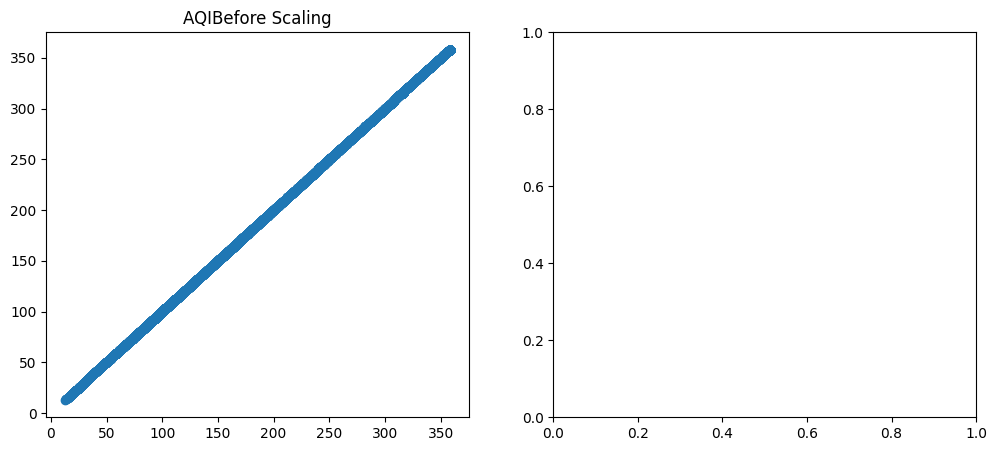

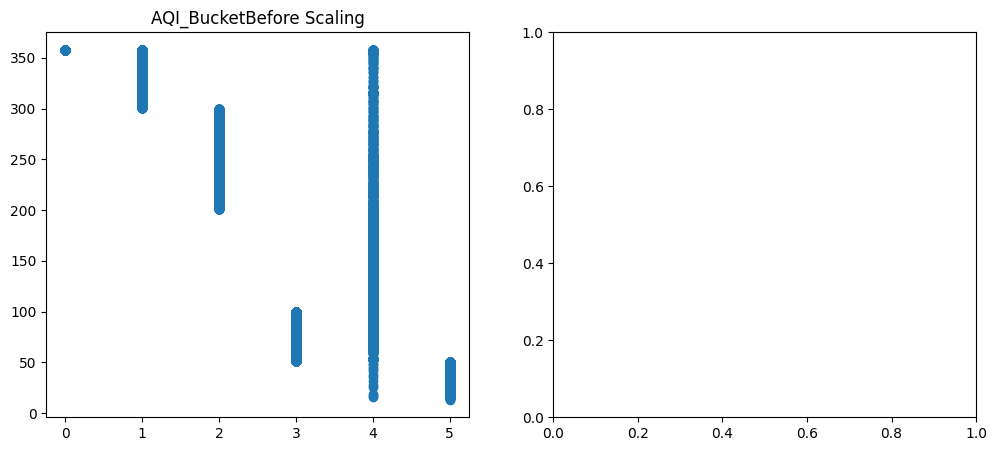

In [41]:
for i in new_df_cap.columns:
    fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize =(12,5))

    ax1.scatter(new_df_cap[i],new_df_cap['AQI'])
    ax1.set_title(f'{i}Before Scaling')
    plt.show()

In [184]:
new_df_cap.isnull().sum()

PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [189]:
cls =new_df_cap2.columns
cls = cls.to_list
cls

<bound method IndexOpsMixin.tolist of Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene'],
      dtype='object')>

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clf2 = ColumnTransformer(transformers=[('tnf1',StandardScaler(),['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI'])],remainder='passthrough')

In [44]:
new_df_cap = clf2.fit_transform(new_df_cap)

In [45]:
new_df_cap = pd.DataFrame(new_df_cap,columns = df.columns)

In [46]:
new_df_cap

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,-1.072626,0.33057,-2.086925,-0.23161,-0.462189,-0.456268,-0.040022,1.569097,2.067061,-1.172823,-1.149836,-0.876117,-0.329978,4.0
1,-0.99328,0.294265,-2.061943,-0.418057,-0.501877,-0.448268,0.024655,1.37443,0.208351,1.117865,0.726118,1.537101,-0.310761,4.0
2,1.434332,0.788346,0.569735,-0.157531,0.138776,-0.613626,1.791642,1.652771,0.031599,1.564282,1.420647,1.387992,2.185305,4.0
3,-0.338019,0.759853,-1.746846,-0.2135,-0.416212,-0.268005,0.793516,0.928988,0.310558,1.259596,1.127242,0.892246,-0.178378,4.0
4,1.751474,1.369949,0.896253,-0.020204,0.446815,-0.603065,1.791642,1.657059,0.468375,1.584555,1.502442,1.481333,2.185305,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,-1.566425,-1.025182,-0.425514,0.194672,-0.331482,-0.230605,-0.730141,-0.225217,-0.394172,0.718998,1.236159,0.65835,-1.19901,5.0
29527,-1.011083,-0.518206,-1.220052,0.249783,-0.497807,-0.27774,-0.641856,0.347741,0.001246,-0.144571,0.11183,0.174126,-0.889404,3.0
29528,-1.086662,-0.687798,-1.21252,0.430049,-0.396413,-0.410596,-0.712202,-0.246537,0.0456,-1.151756,-1.162326,-0.876117,-0.910756,3.0
29529,-1.455262,-1.049378,-1.070117,0.416583,-0.370903,-0.485952,-0.641856,-0.026917,-0.100454,-1.172823,-1.174971,-0.876117,-1.060221,3.0


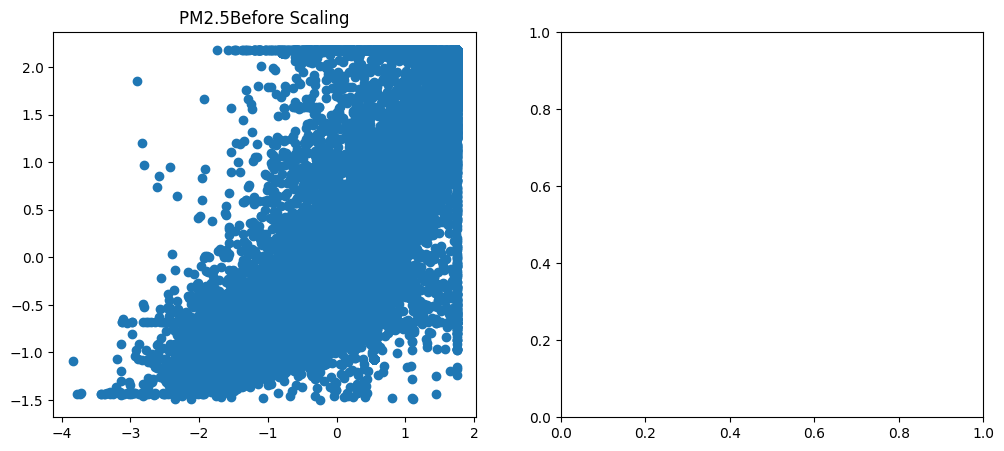

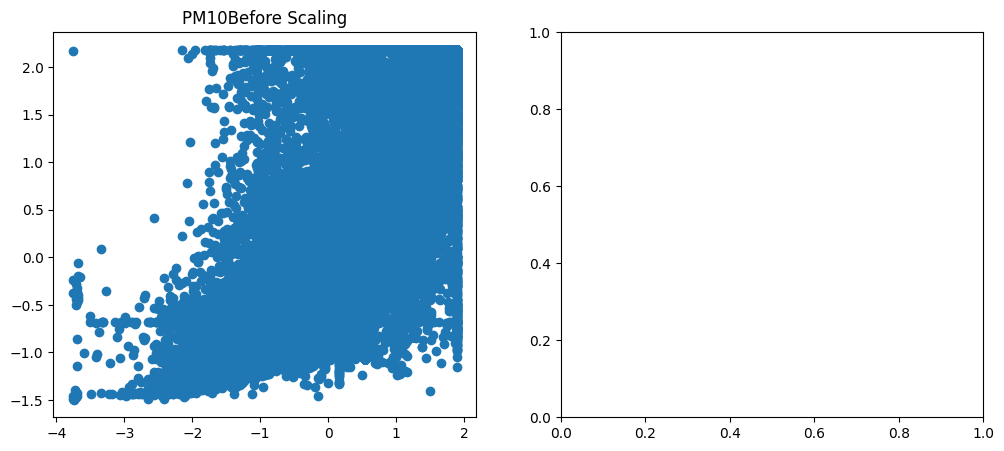

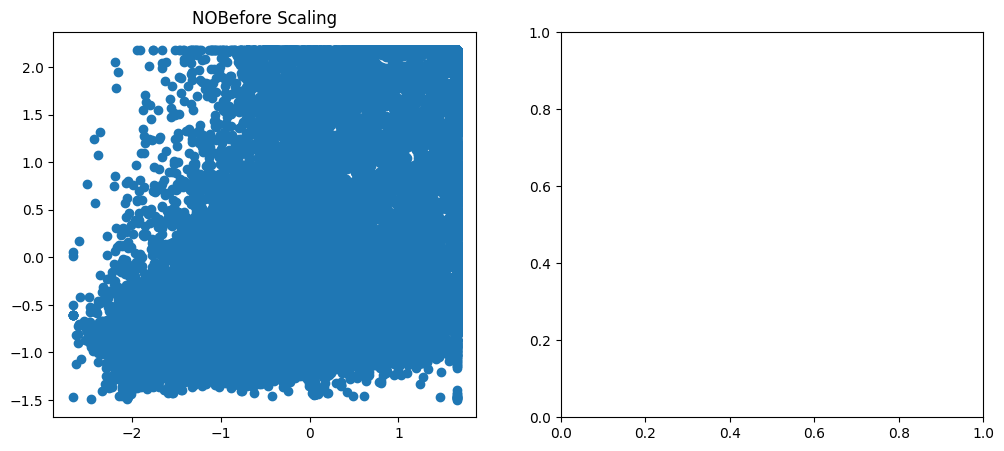

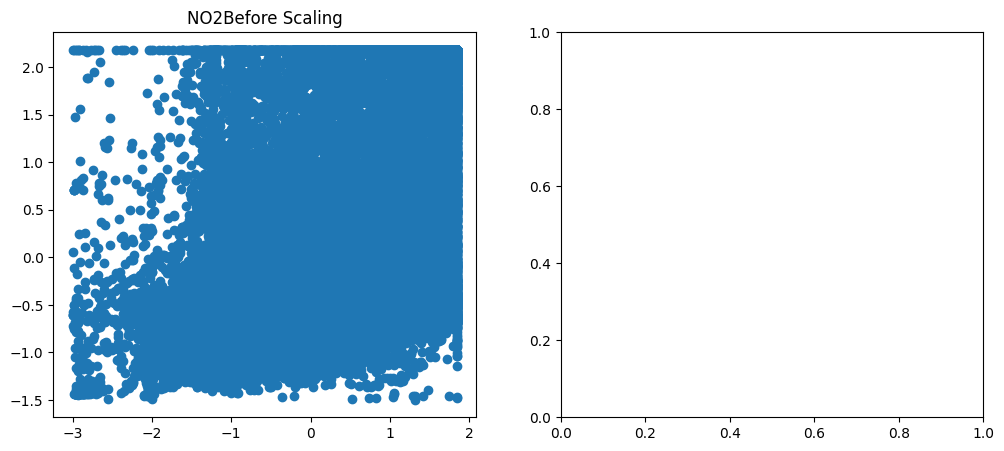

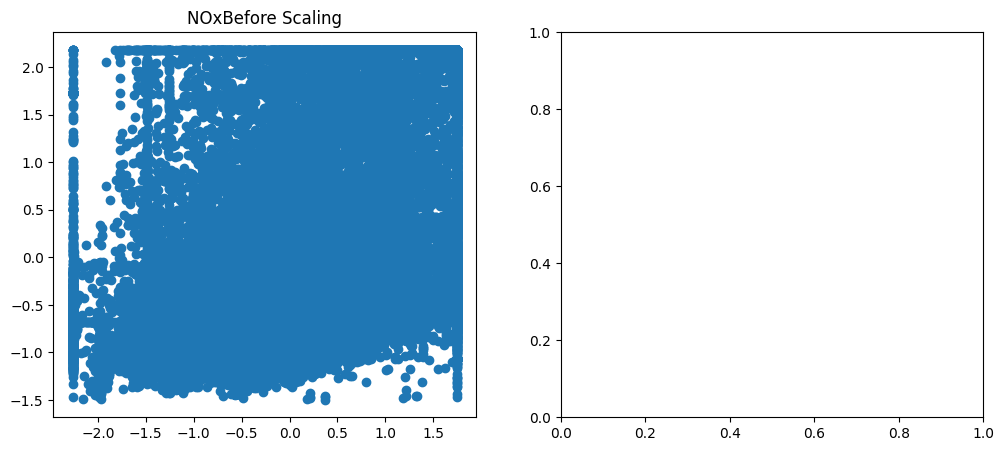

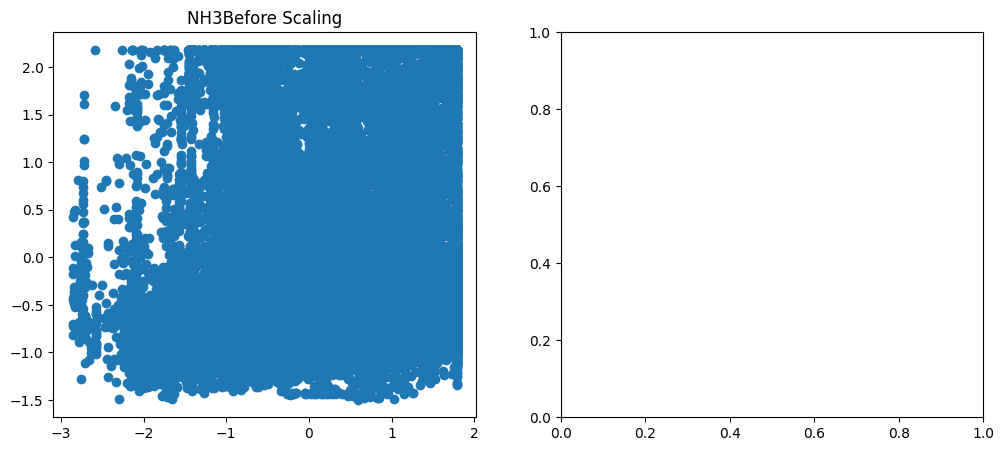

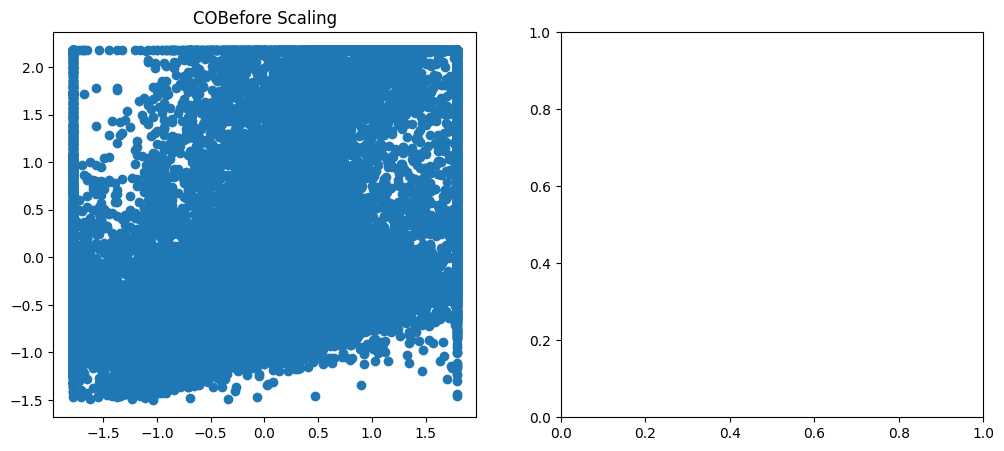

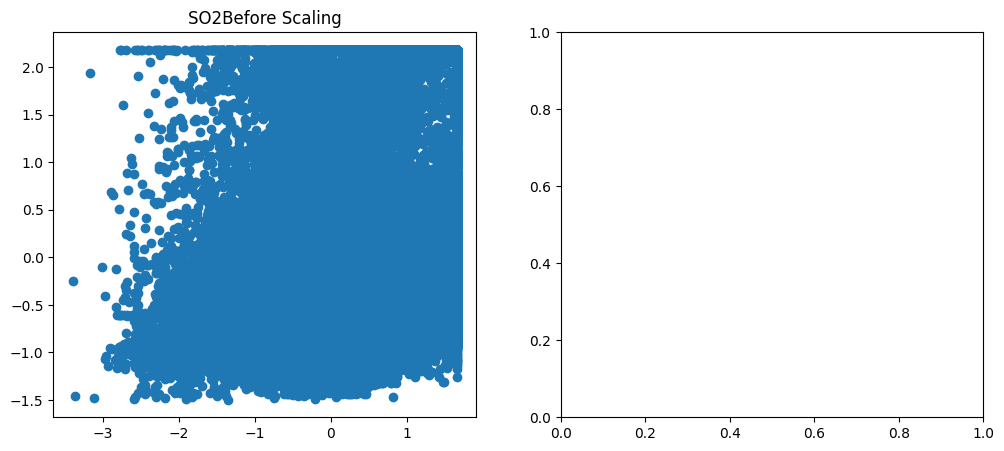

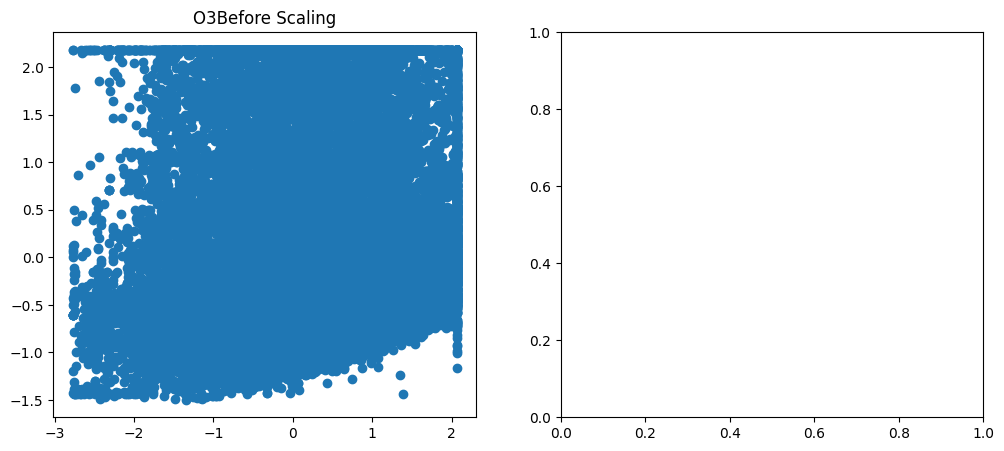

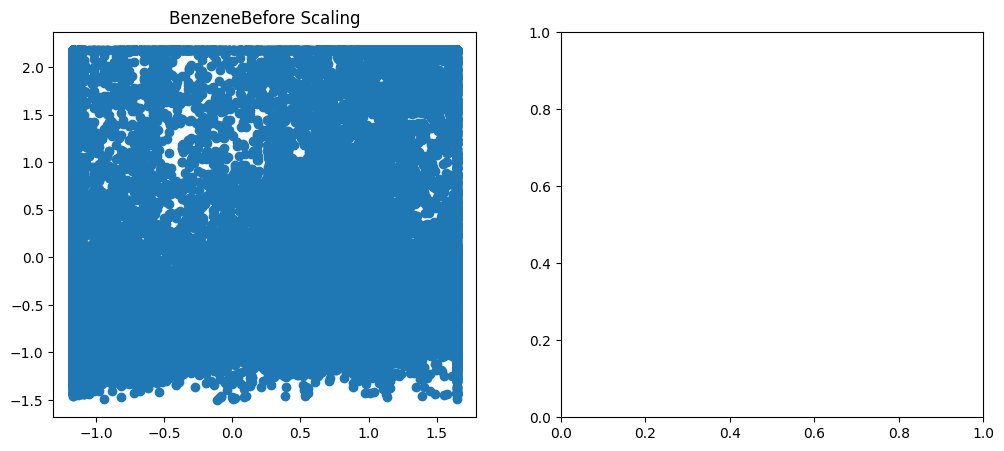

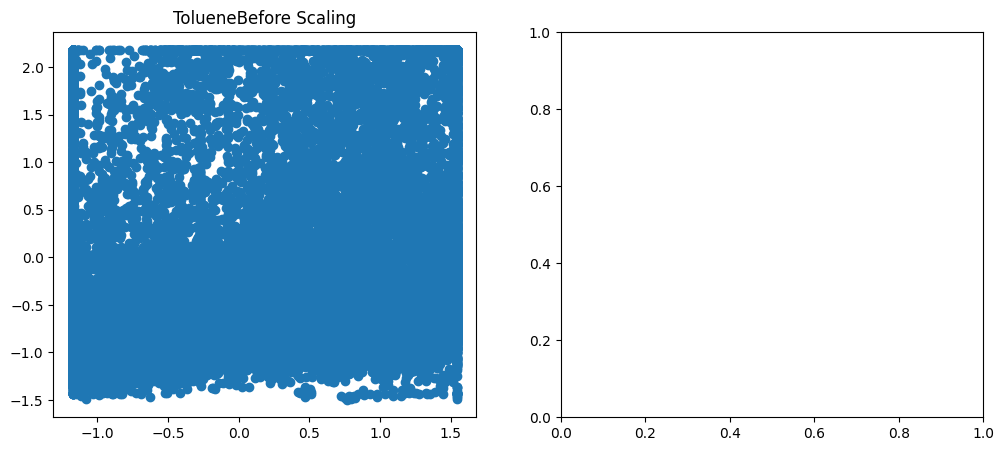

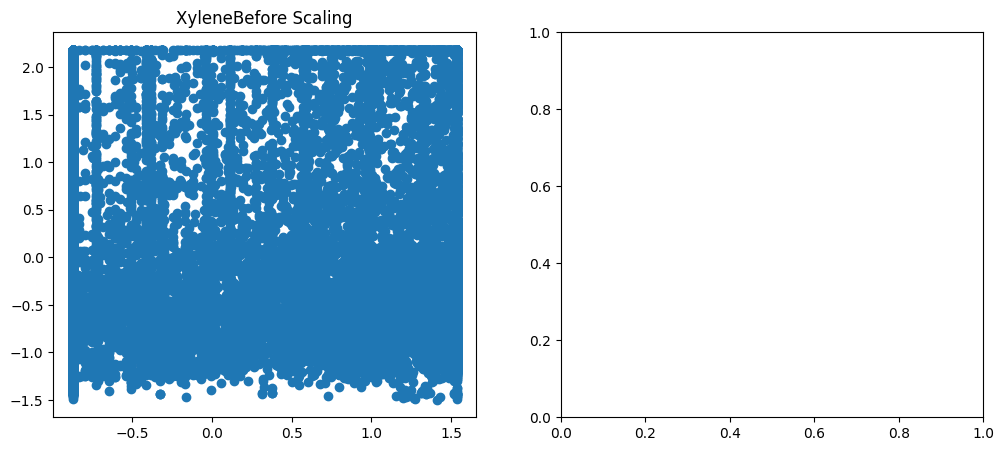

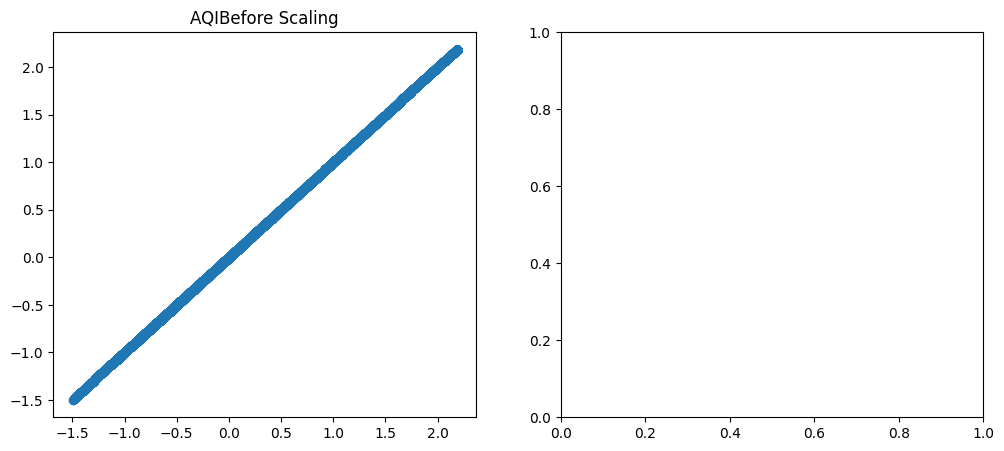

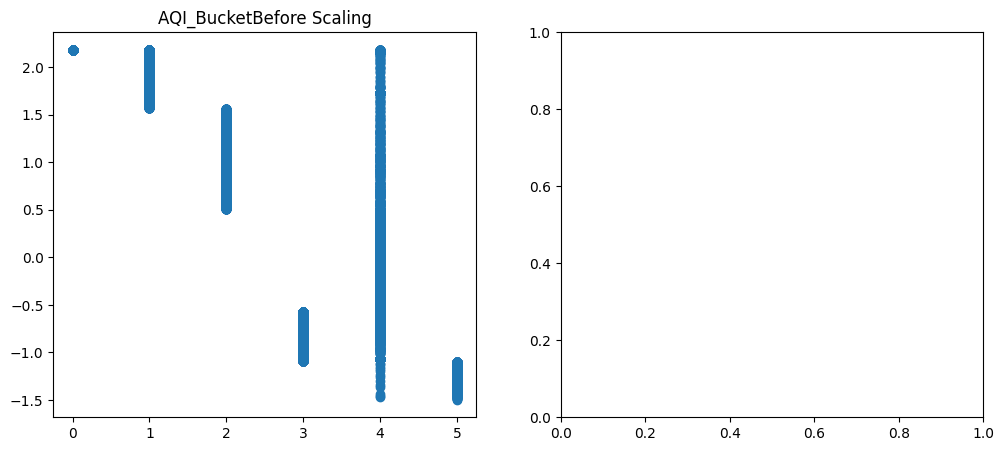

In [47]:
for i in new_df_cap.columns:
    fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize =(12,5))

    ax1.scatter(new_df_cap[i],new_df_cap['AQI'])
    ax1.set_title(f'{i}Before Scaling')
    plt.show()

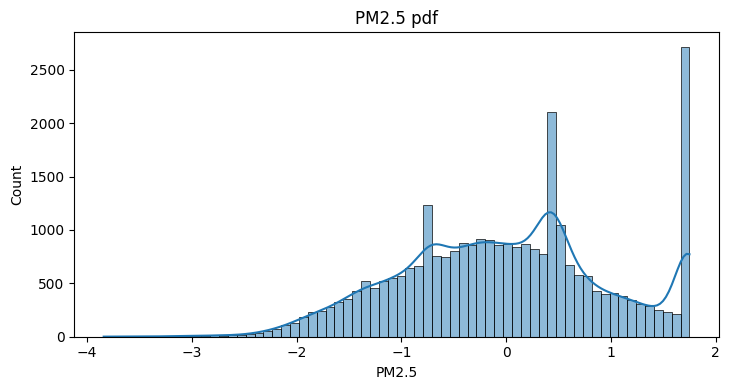

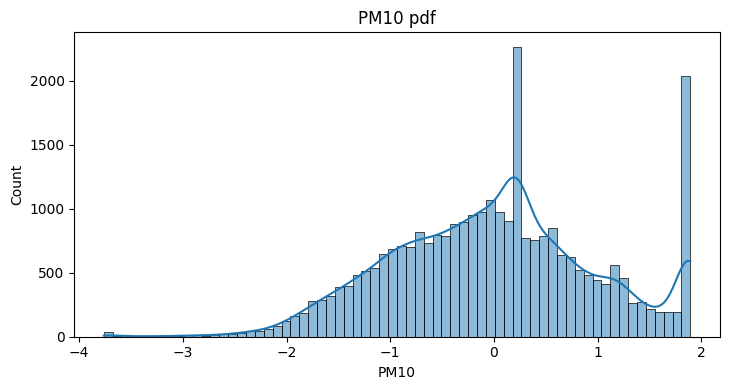

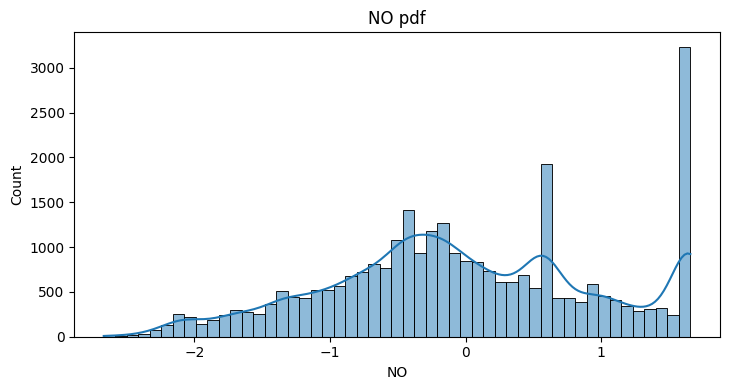

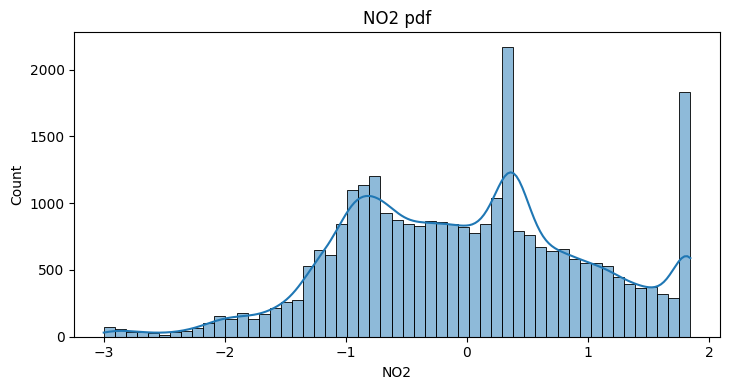

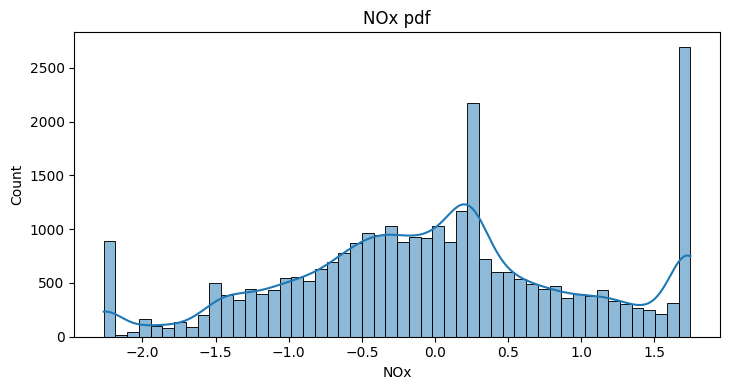

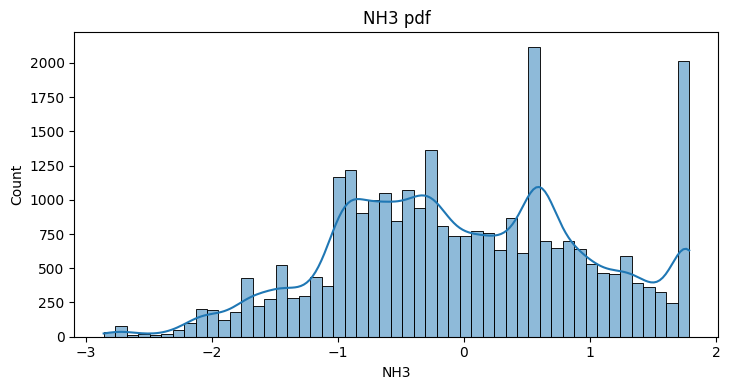

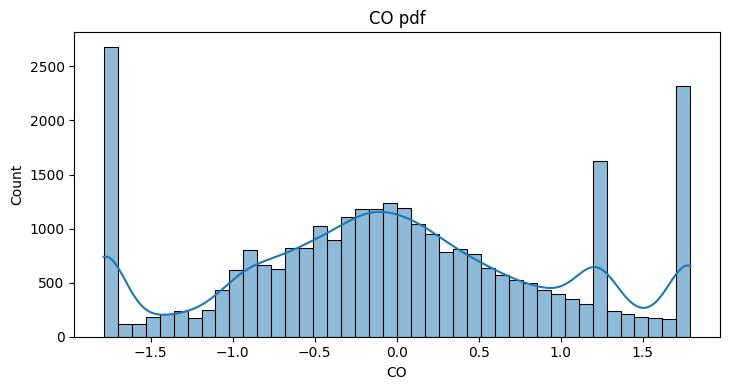

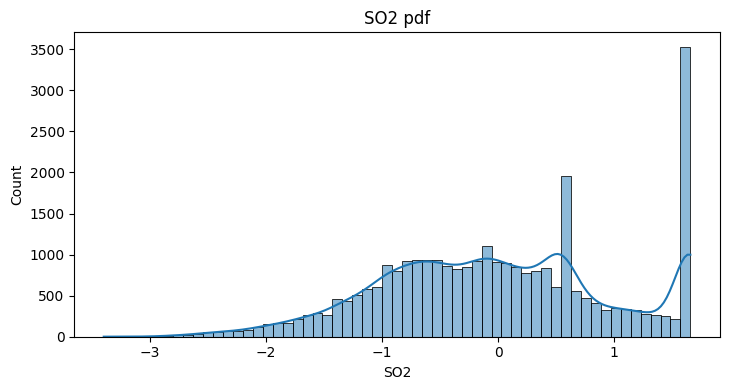

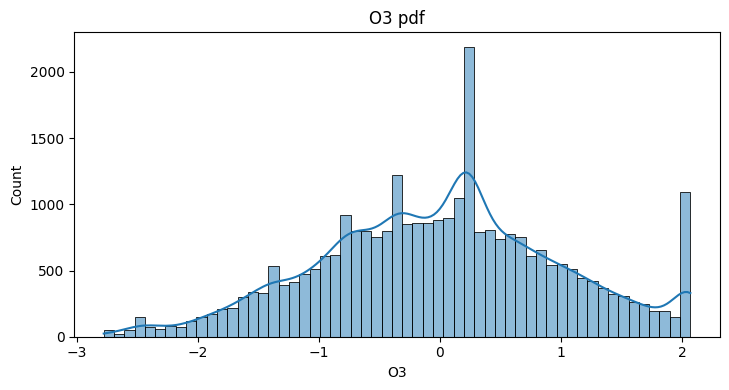

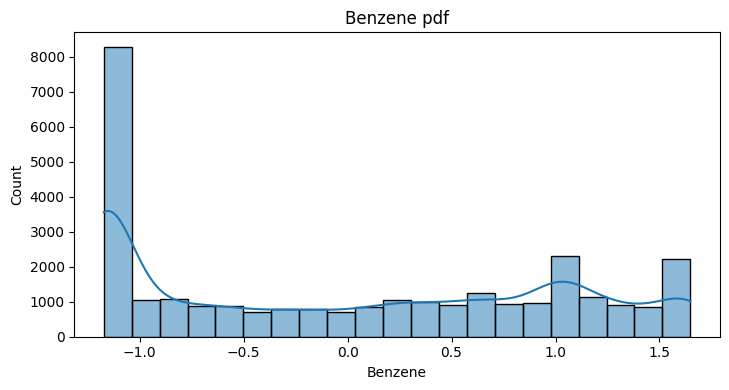

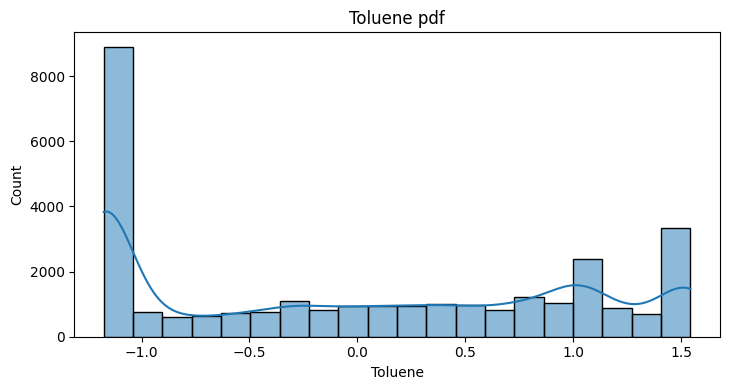

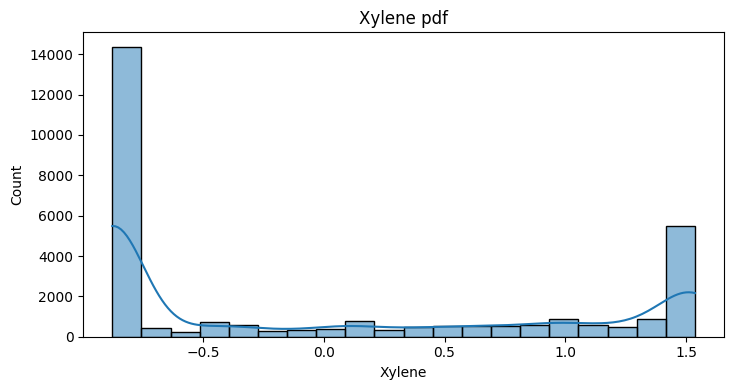

In [48]:
from scipy import stats
for i in new_df_cap2.columns:
    
    plt.figure(figsize=(14,4))

# Plot the Age PDF
    plt.subplot(121)
    sns.histplot(new_df_cap[i], kde=True)  # Use sns.histplot with kde=True for a similar effect to displot
    plt.title(f'{i} pdf')


    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()

In [49]:
x2 = new_df_cap.drop( columns= 'AQI')

In [50]:
y2 = new_df_cap['AQI']

In [56]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.3,random_state=42)
from sklearn.linear_model import LinearRegression
model4 = LinearRegression()
model4 .fit(x2_train,y2_train)

LinearRegression()

In [57]:
predictions4 = model4.predict(x2_test)
from sklearn.metrics import r2_score
r2_score(predictions4,y2_test)

0.7325490144366464

In [61]:
from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor()
lr.fit(x2_train,y2_train)

RandomForestRegressor()

In [64]:
predictions6 = lr.predict(x2_test)
r2_score(predictions6,y2_test)

0.9388697228804079